# Libraries

In [2]:
# Importaciones de librerías básicas para manipulación de datos y cálculos numéricos
import numpy as np
import pandas as pd
import os

# Crear el directorio si no existe
if not os.path.exists('assets/results/'):
    os.makedirs('assets/results/')

# Importaciones de librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
%matplotlib inline
init_notebook_mode(connected=True)  # Inicializa el modo offline de Plotly para notebooks

# Importaciones de librerías para análisis exploratorio y reporte de datos
from ydata_profiling import ProfileReport  # Genera reportes completos de análisis exploratorio de datos

# Importaciones de librerías para manejo de estructuras de datos y advertencias
from collections import Counter  # Permite contar la cantidad de ocurrencias de cada elemento en una colección
import warnings  # Utilizada para controlar las advertencias de ejecución

# Importaciones de librerías para machine learning y preprocesamiento de datos
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, confusion_matrix, auc, roc_curve, roc_auc_score, log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer

# Importaciones de librerías para manejo de datos desbalanceados
from imblearn.over_sampling import SMOTE, ADASYN 

# Importaciones de librerías para selección de modelos y optimización de hiperparámetros
import optuna
from optuna.integration import XGBoostPruningCallback

# Importaciones de librerías específicas de modelos de machine learning
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import lightgbm as ltb 
from catboost import CatBoostClassifier

# Importaciones de librerías para análisis estadístico y evaluación de modelos
from statsmodels.stats.outliers_influence import variance_inflation_factor
from itertools import combinations

# Importaciones de librerías para interpretación de modelos
import shap

#excel
import openpyxl

# Configuraciones generales
warnings.filterwarnings('ignore')  # Ignora las advertencias para limpiar la salida de la notebook


# Loading Data

## Data

In [3]:
# https://www.kaggle.com/code/mahwiz/prediction-of-students-performance/input?select=data.csv
student = pd.read_csv('data.csv', sep=';')

## Review Data 

In [4]:
student

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [5]:
# check de las filas y columnas del dataset
student.shape

(4424, 37)

In [6]:
# Look at the 35 columns and their information.
student.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [7]:
print(student.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [8]:
student.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [9]:
student.head(5) 

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Ver nulos

In [10]:
# revizar los nulos
student.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [11]:
student.duplicated().sum()

0

## Transformaciones de datos

### Cambio de tipos de la columna"Target"

In [12]:
target_unique_names = {}
target_unique = student['Target'].unique()
for (i, tar) in enumerate(target_unique):
    target_unique_names[tar] = i

In [13]:
student['Target'] = student['Target'].map(target_unique_names)
target_unique_names

{'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}

In [14]:
student['Target'].value_counts()/student['Target'].count()

Target
1    0.499322
0    0.321203
2    0.179476
Name: count, dtype: float64

## Muestra de graficos
quedan en la carpeta **./images/results/**

In [15]:
RESULTS_PATH = "assets/results"
IMAGES_QUALITY = 300

### Valores de categoria

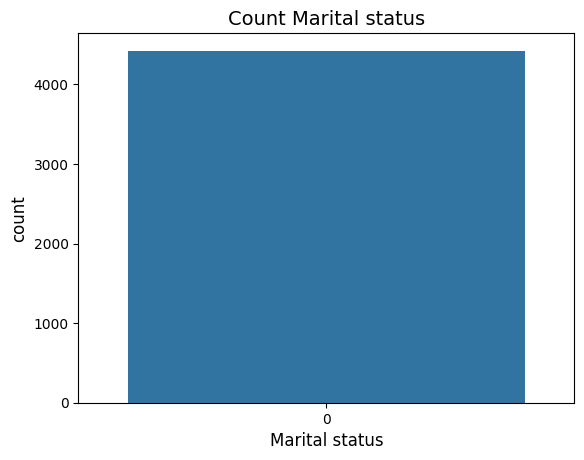

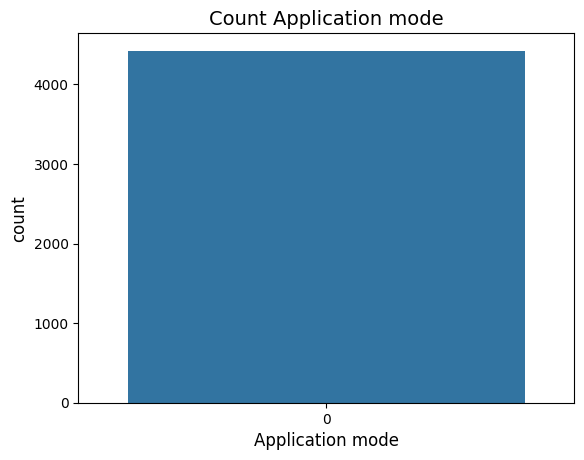

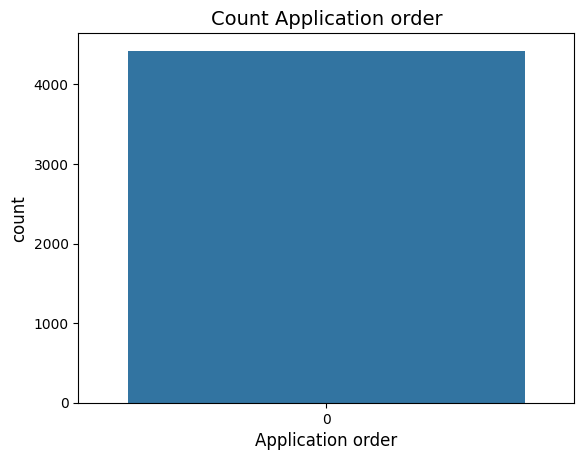

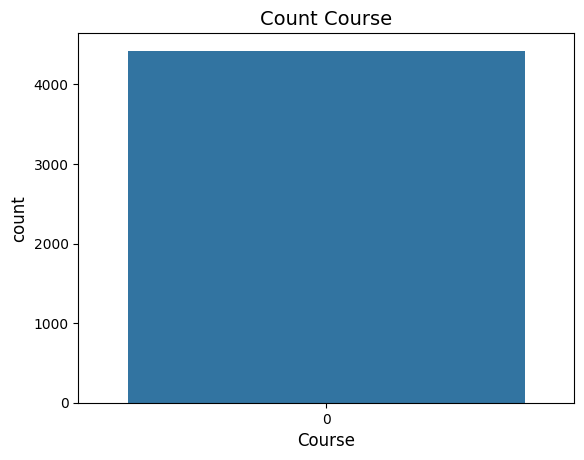

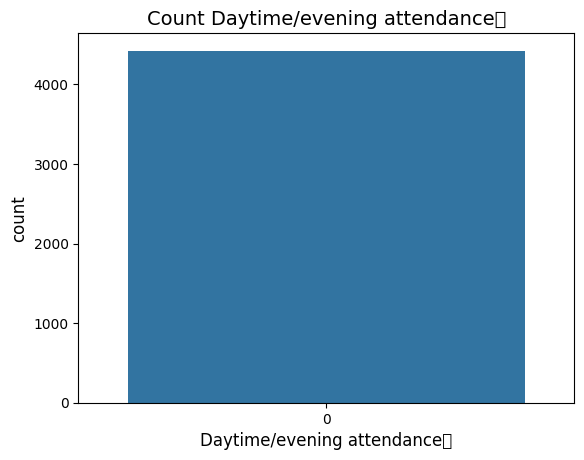

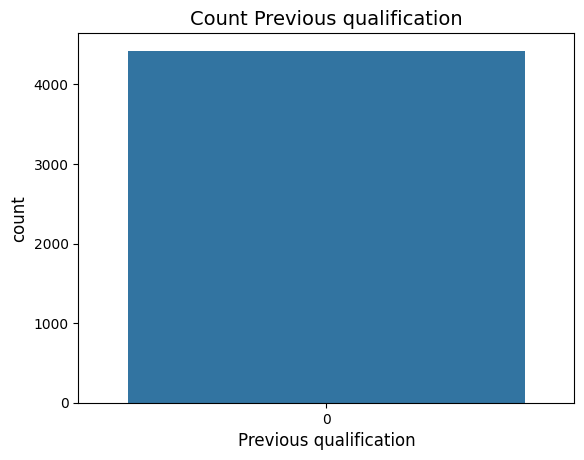

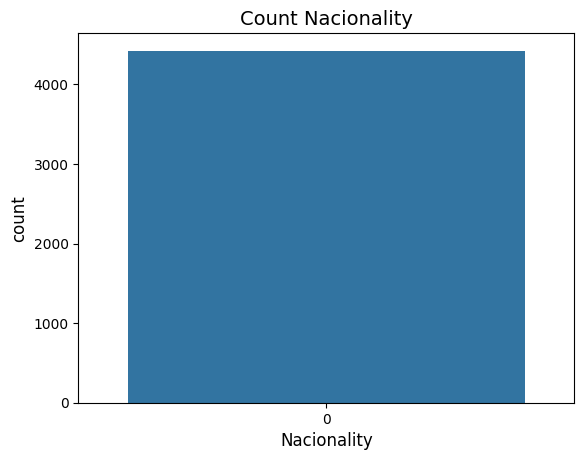

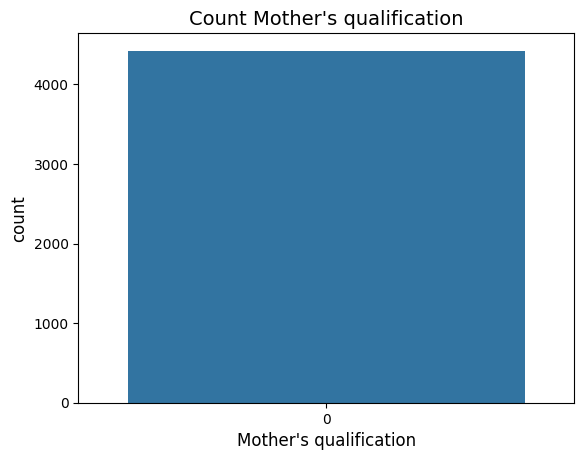

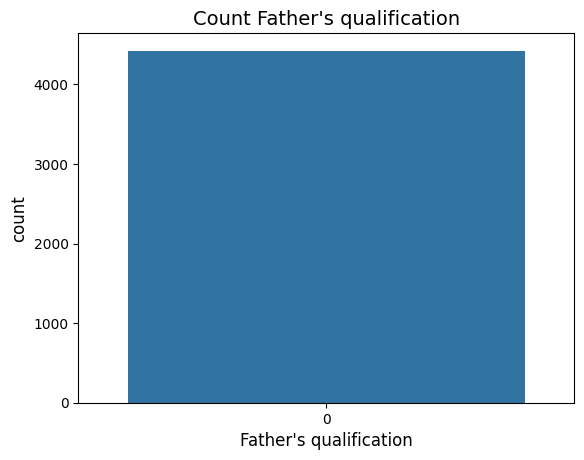

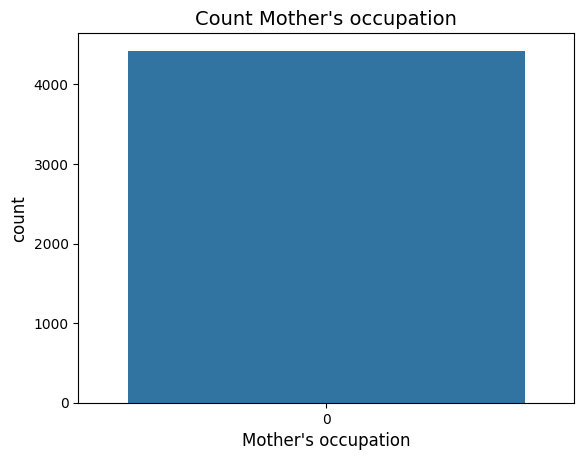

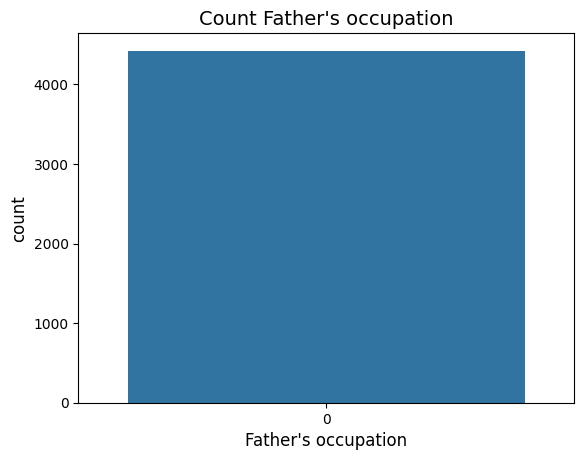

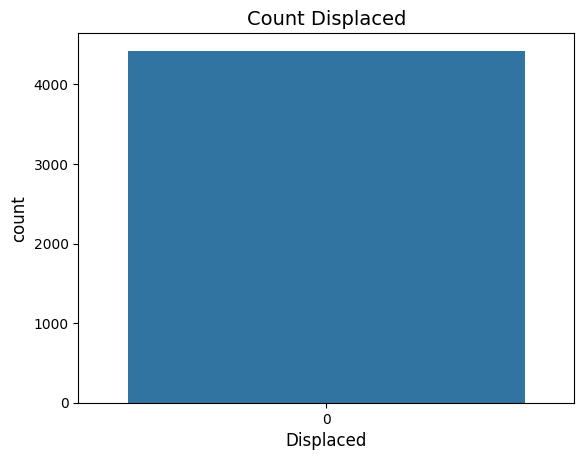

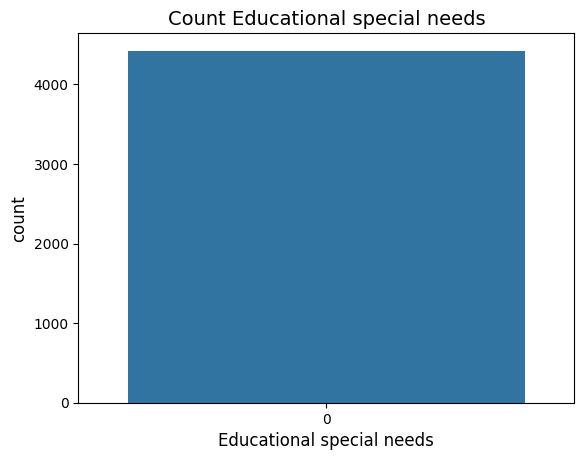

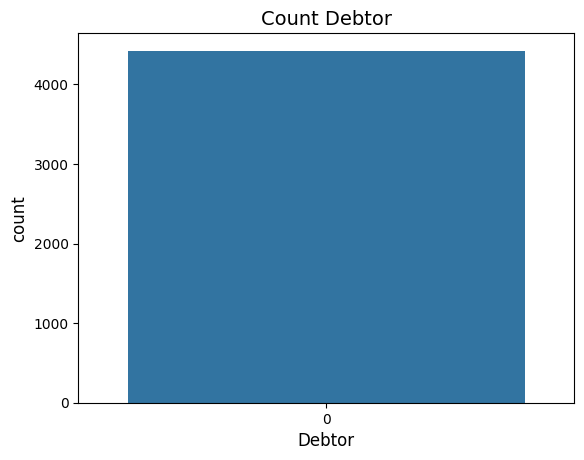

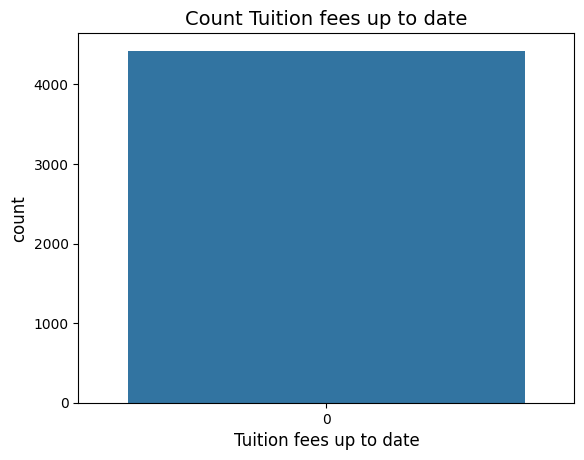

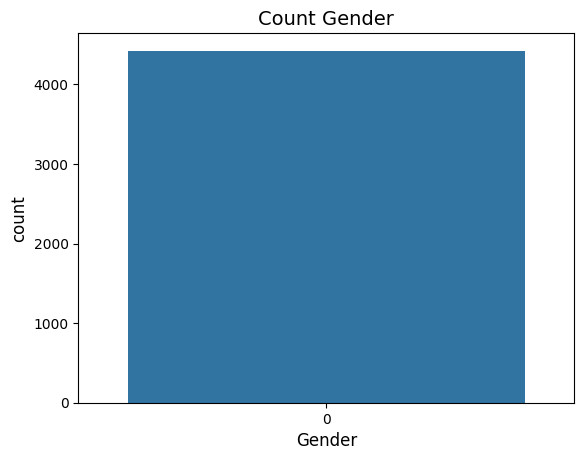

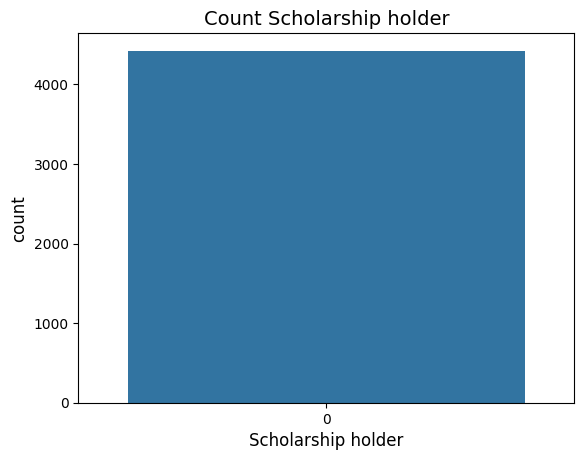

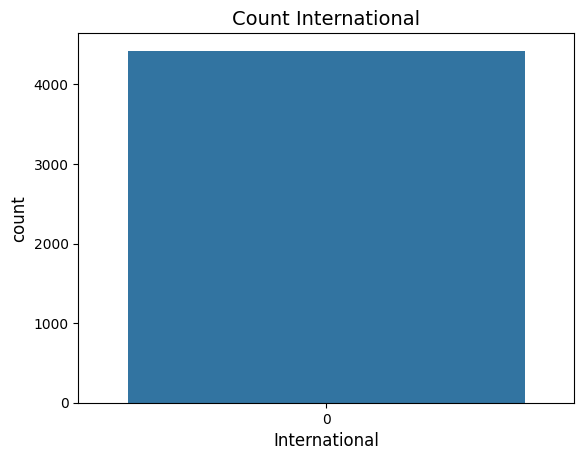

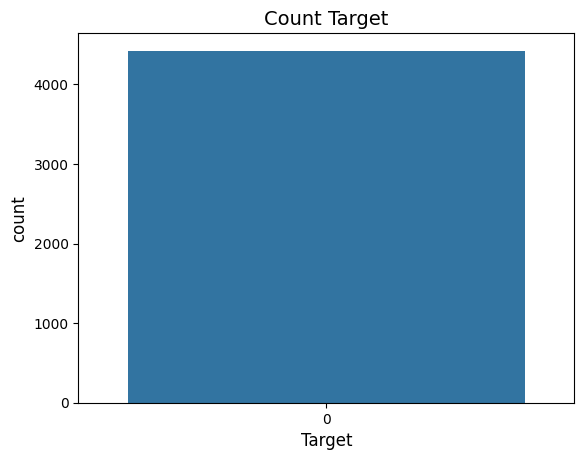

In [16]:
cat_val = ['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification', 'Nacionality',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'International', 'Target']

#Save plots in HD and save to drive
for i in cat_val:
    plt.figure()
    plt.title('Count {}'.format(i), fontsize=14)
    plt.ylabel('Count', fontsize=12)
    plt.xlabel(i, fontsize=12)
    sns.countplot(student[i])
    plt.savefig(RESULTS_PATH+'/cat_{}.png'.format(i.split('/')[0]),dpi=IMAGES_QUALITY, bbox_inches = "tight")
    plt.show()

### Valores de numero

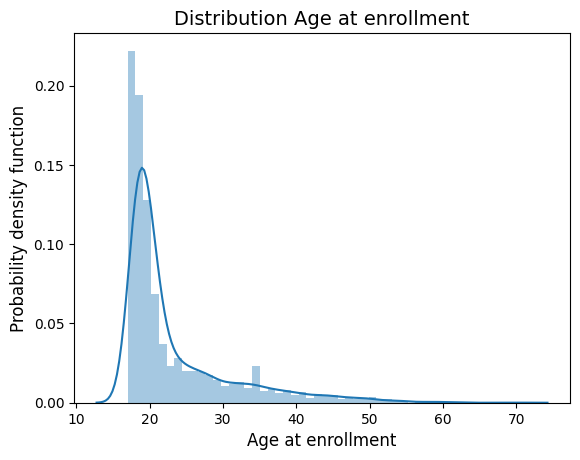

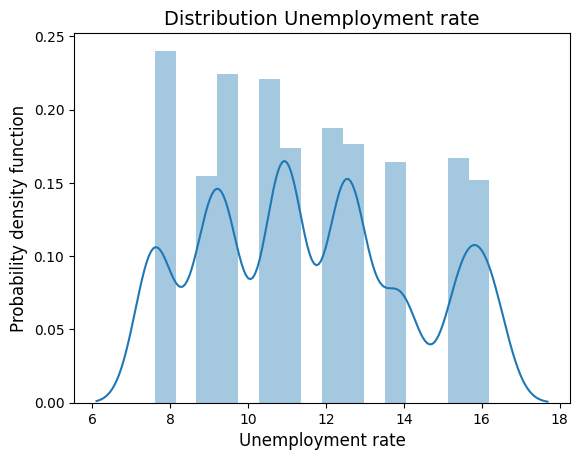

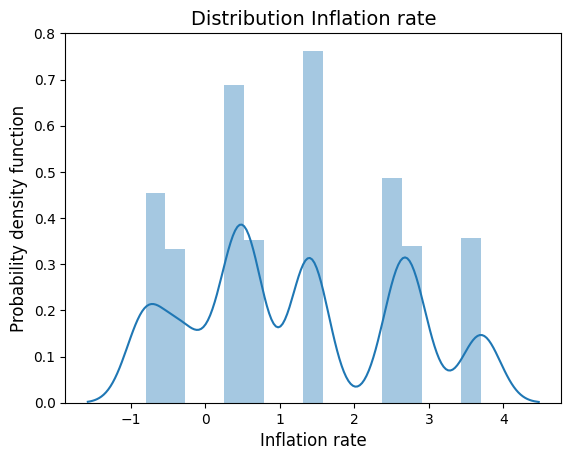

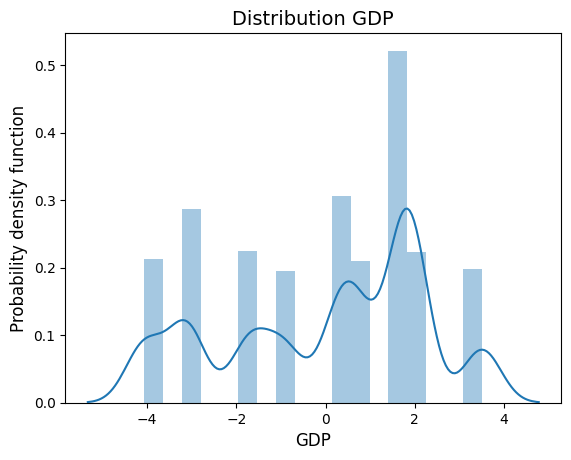

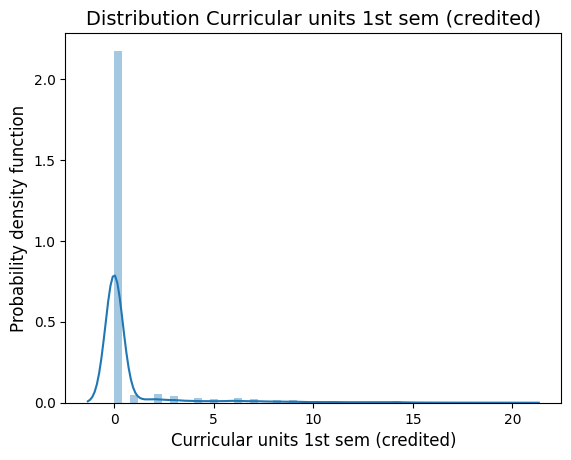

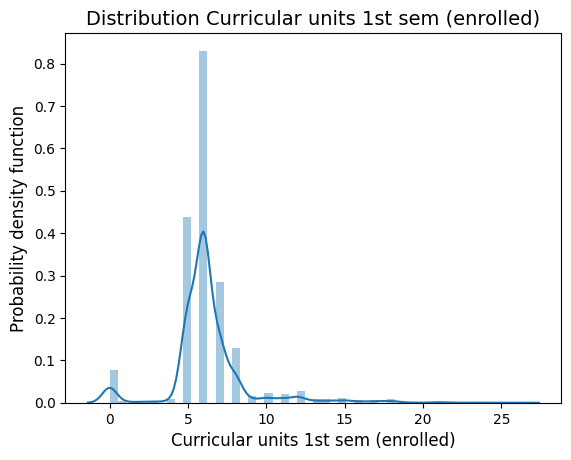

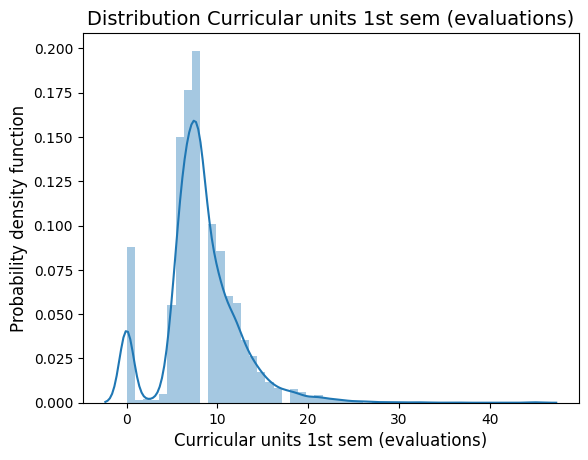

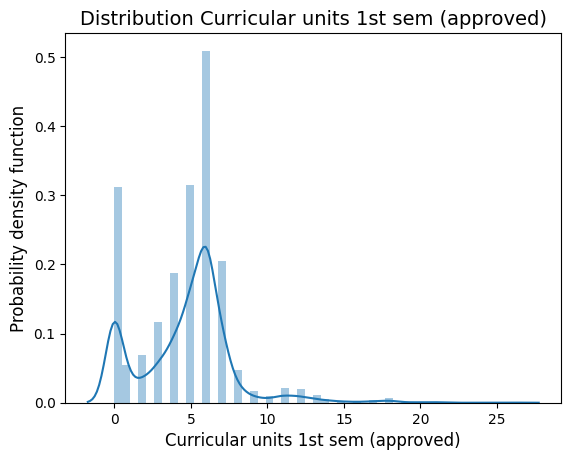

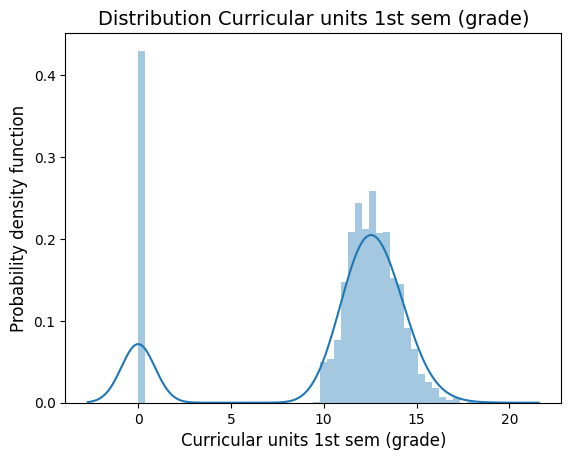

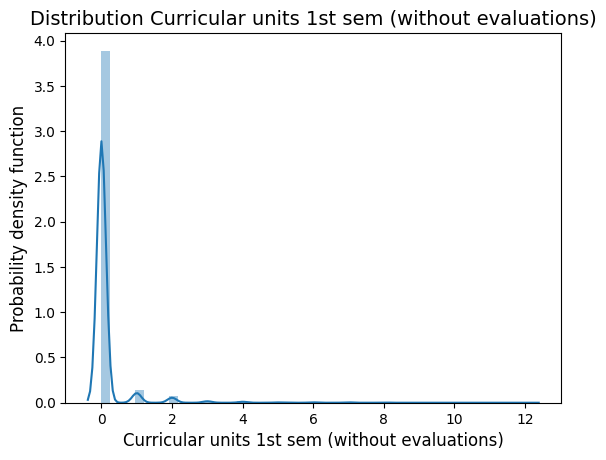

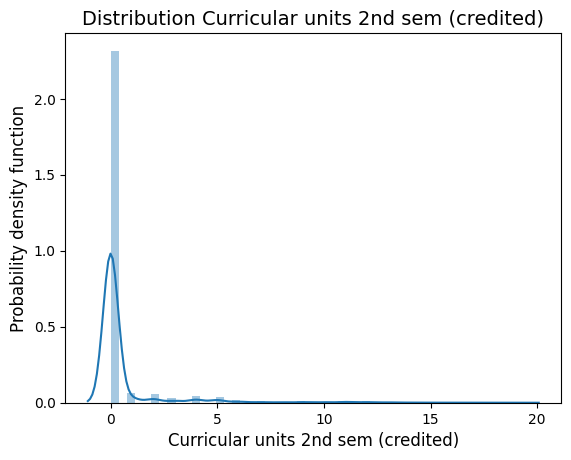

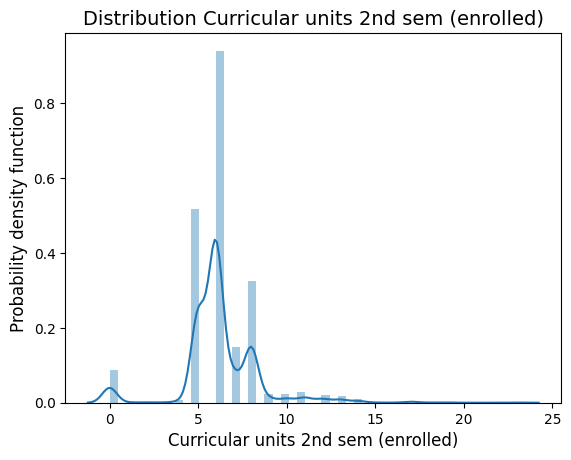

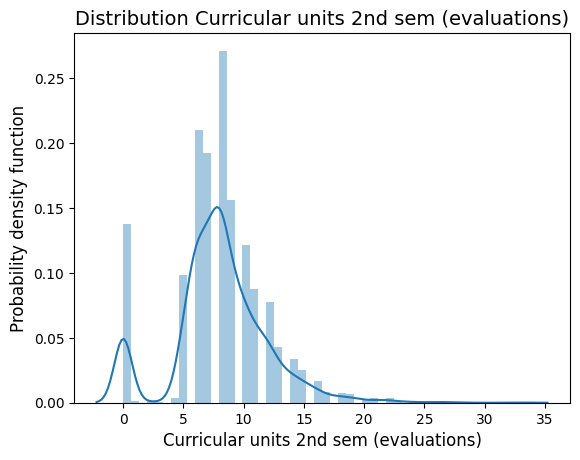

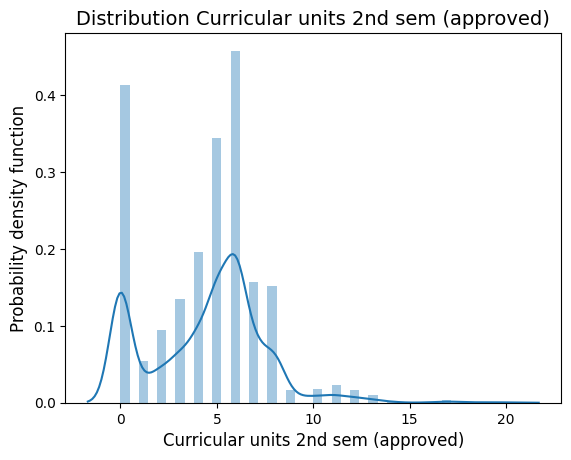

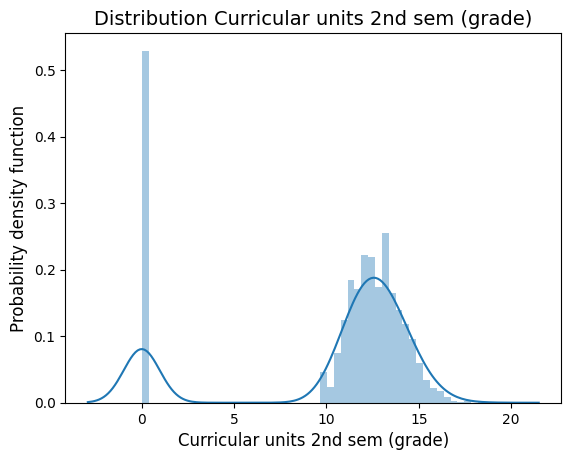

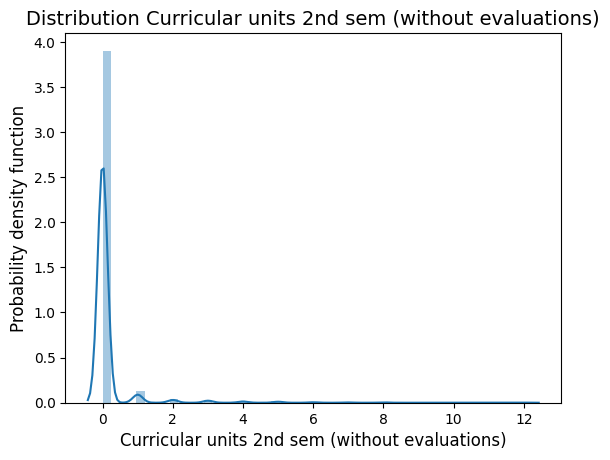

In [17]:
numerical_val = ['Age at enrollment','Unemployment rate','Inflation rate','GDP',
                 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)']

#Save plots in HD and save to drive
for i in numerical_val:
    plt.figure()
    plt.title('Distribution {}'.format(i), fontsize=14)
    plt.ylabel('Probability density function', fontsize=12)
    plt.xlabel(i, fontsize=12)
    sns.distplot(student[i])
    plt.savefig(RESULTS_PATH+'/num_{}.png'.format(i),dpi=IMAGES_QUALITY, bbox_inches = "tight")
    plt.show()

### Verificar coorelaciones

#### coorelaciones con target

In [18]:
student.corr()['Target']#.iloc[:34].max()

Marital status                                   -0.074310
Application mode                                 -0.116928
Application order                                 0.027393
Course                                            0.024210
Daytime/evening attendance\t                      0.066439
Previous qualification                           -0.027984
Previous qualification (grade)                    0.025096
Nacionality                                       0.002098
Mother's qualification                           -0.075941
Father's qualification                           -0.035183
Mother's occupation                               0.051664
Father's occupation                               0.051455
Admission grade                                   0.038716
Displaced                                         0.070649
Educational special needs                         0.003751
Debtor                                           -0.154802
Tuition fees up to date                           0.3421

#### coorelaciones entre todas las columnas numericas
Al aplicar np.triu(student.corr()), se está generando una matriz de correlación para el DataFrame student donde solo se retienen las correlaciones en la parte superior de la diagonal principal (incluyendo la diagonal), y el resto se establece en cero. Esto simplifica la visualización y el análisis de la matriz de correlación al:

- Eliminar valores duplicados que no aportan información adicional, dado que la matriz de correlación es simétrica.
- Facilitar la identificación de relaciones significativas entre variables, concentrándose solo en la mitad superior de la matriz.

In [19]:
np.triu(student.corr())

array([[ 1.        ,  0.26400582, -0.12585445, ...,  0.00876135,
        -0.02700341, -0.0743098 ],
       [ 0.        ,  1.        , -0.28635726, ..., -0.01637463,
        -0.02274272, -0.11692846],
       [ 0.        ,  0.        ,  1.        , ..., -0.01113321,
         0.03020082,  0.02739262],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.11229464, -0.02179757],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.03705169],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

#### Mapa de calor de la matriz de 
puedes verlo de las dos maneras, la mas optimizada es con np.triu(student.corr()

<Axes: >

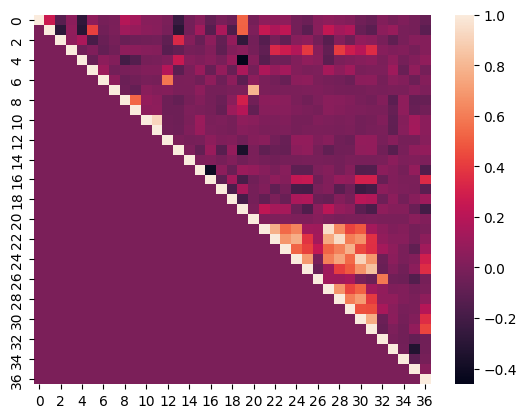

In [20]:
#sns.heatmap(student.corr())
sns.heatmap(np.triu(student.corr()))

#### Grafico de estado de estudiantes

In [21]:
# Plot the above values
x = student['Target'].value_counts().index
y = student['Target'].value_counts().values

df = pd.DataFrame({
    'Target': x,
    'Count' : y
})

fig = px.pie(df,
             names ='Target', 
             values ='Count',
            title='How many failures, enrolled & graduates are there in Target column')

fig.update_traces(labels=target_unique, hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.write_html(RESULTS_PATH+'/Target_chart.html')
 

In [22]:
student['Target'].value_counts()

Target
1    2209
0    1421
2     794
Name: count, dtype: int64

In [23]:
student['Target'].value_counts()/student['Target'].count()

Target
1    0.499322
0    0.321203
2    0.179476
Name: count, dtype: float64

In [24]:
# Extract Input & Output Columns
X = student.iloc[:,0:-1]
Y = student.iloc[:,-1]
Y

0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Target, Length: 4424, dtype: int64

# Pandas Profiling 

### Generando reporte

In [25]:
profiling = ProfileReport(student,title = "Profile Report", )

In [26]:
output_file_path = RESULTS_PATH+'/student_profile_report.html'
# Guardar el reporte en el archivo especificado
profiling.to_file(output_file_path)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Resampling
## SMOTE & ADASYN

SMOTE (Synthetic Minority Over-sampling Technique)

> Es una técnica de sobremuestreo que ayuda a mitigar el problema del desbalance de clases al generar ejemplos sintéticos de la clase minoritaria

ADASYN (Adaptive Synthetic Sampling)

> es una extensión de SMOTE que intenta generar ejemplos sintéticos enfocándose más en las regiones del espacio de características donde la clase minoritaria está menos representada. La idea detrás de ADASYN es utilizar un mecanismo adaptativo para decidir cuántos ejemplos sintéticos necesitan ser generados para cada ejemplo de la clase minoritaria.

**Paso1:** Se inicializa un objeto SMOTE con una semilla aleatoria. Luego, se aplica el sobremuestreo al conjunto de datos original X, Y para generar un nuevo conjunto de datos X_smote, Y_smote con clases equilibradas.

In [27]:
resample_smote = SMOTE(random_state=42)
X_smote, Y_smote = resample_smote.fit_resample(X, Y)
print('Resampled dataset shape %s' % Counter(Y_smote))

Resampled dataset shape Counter({0: 2209, 1: 2209, 2: 2209})


**Paso2:** Similar al paso 1, pero usando ADASYN para el sobremuestreo, generando un conjunto de datos X_ada, Y_ada con clases equilibradas y mostrando su distribución.

In [28]:
resample_ada = ADASYN(random_state=42)
X_ada, Y_ada = resample_ada.fit_resample(X, Y)
print('Resampled dataset shape %s' % Counter(Y_ada))

Resampled dataset shape Counter({1: 2209, 0: 2187, 2: 2027})


**Paso3:** Se divide el conjunto de datos sobremuestreado con SMOTE en subconjuntos de entrenamiento y prueba, utilizando un 20% de los datos para prueba.

In [29]:
X_train_smote,X_test_smote,Y_train_smote,Y_test_smote = train_test_split(X_smote,Y_smote,test_size=0.2)

**Paso4:** Igual que el paso 3, pero para el conjunto de datos sobremuestreado con ADASYN.

In [30]:
X_train_ada,X_test_ada,Y_train_ada,Y_test_ada = train_test_split(X_ada,Y_ada,test_size=0.2)

**Paso5:** Se inicializan dos clasificadores de árboles de decisión, uno para cada conjunto de datos sobremuestreados (SMOTE y ADASYN), con la misma semilla aleatoria para reproducibilidad.

In [31]:
dt_smote = DecisionTreeClassifier(random_state=42)
dt_ada = DecisionTreeClassifier(random_state=42)

**Paso6:** Se entrenan los clasificadores de árbol de decisión con los conjuntos de entrenamiento correspondientes a cada técnica de sobremuestreo.

In [32]:
dt_smote = dt_smote.fit(X_train_smote,Y_train_smote)
dt_ada = dt_ada.fit(X_train_ada,Y_train_ada)

**Paso7:** Se utilizan los modelos entrenados para predecir las etiquetas de los conjuntos de prueba.

In [33]:
pred_smote = dt_smote.predict(X_test_smote)
pred_ada = dt_ada.predict(X_test_ada)

**Paso8:** Se evalúa el rendimiento del modelo entrenado con SMOTE en el conjunto de prueba, mostrando métricas de clasificación como precisión, recall, y F1-score.

In [34]:
print(classification_report(Y_test_smote, pred_smote))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       468
           1       0.76      0.75      0.76       422
           2       0.68      0.71      0.70       436

    accuracy                           0.74      1326
   macro avg       0.74      0.74      0.74      1326
weighted avg       0.74      0.74      0.74      1326



**Paso9:** Se evalúa el rendimiento del modelo entrenado con ADASYN, similar al paso 8.

In [35]:
print(classification_report(Y_test_ada, pred_ada))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       413
           1       0.75      0.76      0.76       448
           2       0.68      0.65      0.67       424

    accuracy                           0.72      1285
   macro avg       0.72      0.72      0.72      1285
weighted avg       0.72      0.72      0.72      1285



### Crear informes excel de SMOTE y Adasyn

In [36]:
# Creating excell file -> smote
excel_report_smote = classification_report(Y_test_smote, pred_smote, output_dict=True)
excel_report_smote = pd.DataFrame(excel_report_smote).transpose() 
excel_report_smote.to_excel(RESULTS_PATH+"/excel_report_smote.xlsx")

In [37]:
# Creating excell file -> adasyn
excel_report_ada = classification_report(Y_test_ada, pred_ada,output_dict=True)
excel_report_ada = pd.DataFrame(excel_report_smote).T 
excel_report_ada.to_excel(RESULTS_PATH+"/excel_report_ada.xlsx")

# VIF - Multicolinearity verification

**Paso1:** Esta función calcula el VIF para cada variable independiente en un DataFrame X. Crea un nuevo DataFrame vif que contiene los nombres de las variables y sus respectivos valores de VIF. Utiliza la función variance_inflation_factor para calcular el VIF de cada variable.

In [38]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

**Paso2:** Se calcula el VIF para las variables del conjunto de datos sobremuestreado X_smote usando la función calc_vif. Luego, se cuenta el número de variables con un VIF menor a 5, lo que sugiere que estas variables tienen una colinealidad moderada o baja con otras variables.

In [39]:
vif_score = calc_vif(X_smote)
len(vif_score['variables'][vif_score['VIF']<5].values)

16

**Paso3:** Se guarda el DataFrame vif_score, que contiene los valores de VIF para cada variable, en un archivo Excel llamado table_vif_score.xlsx en la ubicación especificada por RESULTS_PATH.

Cambie el nombre de la tabla para nuestra conveniencia

In [40]:
vif_score.to_excel(RESULTS_PATH+'/table_vif_score.xlsx')

**Paso4:** Este fragmento simplemente muestra el DataFrame vif_score completo, que incluye los nombres de las variables y sus respectivos valores de VIF.

In [41]:
# to table -> excel
vif_score

,variables,VIF
0,Marital status,7.430834
1,Application mode,4.080695
2,Application order,3.468544
3,Course,42.147951
4,Daytime/evening attendance\t,11.741604
5,Previous qualification,1.618069
6,Previous qualification (grade),145.931824
7,Nacionality,2.444428
8,Mother's qualification,4.170568
9,Father's qualification,4.733981


**Paso5:** Se seleccionan y muestran las variables cuyo VIF es mayor a 10. Estos valores indican una alta colinealidad, lo que podría ser problemático para algunos modelos de regresión.

In [42]:
vif_score[vif_score["VIF"] > 10]  

,variables,VIF
3,Course,42.147951
4,Daytime/evening attendance\t,11.741604
6,Previous qualification (grade),145.931824
12,Admission grade,128.791533
19,Age at enrollment,23.497958
21,Curricular units 1st sem (credited),16.223350
22,Curricular units 1st sem (enrolled),178.246059
23,Curricular units 1st sem (evaluations),20.542475
24,Curricular units 1st sem (approved),34.572985
25,Curricular units 1st sem (grade),29.798288


**Paso6:** Se seleccionan y muestran las variables con un VIF menor a 5, indicando una colinealidad aceptable.

In [43]:
vif_score[vif_score["VIF"] < 5]    

,variables,VIF
1,Application mode,4.080695
2,Application order,3.468544
5,Previous qualification,1.618069
7,Nacionality,2.444428
8,Mother's qualification,4.170568
9,Father's qualification,4.733981
13,Displaced,2.441712
14,Educational special needs,1.015639
15,Debtor,1.239607
17,Gender,1.606558


**Paso7:** Se seleccionan y muestran las variables cuyo VIF está en el rango de 5 a 10, sugiriendo una colinealidad moderada.

In [44]:
vif_score[(vif_score["VIF"] > 5) & (vif_score["VIF"] < 10)]

,variables,VIF
0,Marital status,7.430834
10,Mother's occupation,8.380226
11,Father's occupation,8.458363
16,Tuition fees up to date,7.442685


**Paso8:** Se guardan dos conjuntos de variables basados en sus valores de VIF en archivos Excel separados:

- Las variables con VIF mayor a 10 se guardan en vif_score-higher-than-10.xlsx.
- Las variables con VIF entre 5 y 10 se guardan en vif_score-bet-5-10.xlsx.

In [45]:
# EXCEL 
vif_score[vif_score["VIF"] > 10].to_excel(RESULTS_PATH+"/vif_score-higher-than-10.xlsx")  
vif_score[(vif_score["VIF"] > 5) & (vif_score["VIF"] < 10)].to_excel(RESULTS_PATH+"/vif_score-bet-5-10.xlsx")  

# PART 1 => 
## ML Supervised Models (traditional algorithms)

## 1) Decision Tree

1. **Entrenamiento y predicción:** Se entrena un clasificador de árbol de decisión con el conjunto de entrenamiento y se hacen predicciones sobre el conjunto de prueba.

In [46]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train_smote,Y_train_smote)
dt_pred = dt.predict(X_test_smote)

2. **Informe de clasificación:** Se evalúa el rendimiento del modelo utilizando `classification_report` para mostrar métricas clave como precisión, recall y F1-score.

In [47]:
print(classification_report(Y_test_smote,dt_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       468
           1       0.76      0.75      0.76       422
           2       0.68      0.71      0.70       436

    accuracy                           0.74      1326
   macro avg       0.74      0.74      0.74      1326
weighted avg       0.74      0.74      0.74      1326



### Decision Tree - Hyperparameter optimization using Optuna

3. **Optimización de hiperparámetros con Optuna:** Se define una función objetivo que Optuna utilizará para encontrar los mejores hiperparámetros (`max_depth`, `min_samples_leaf`, `criterion`) del árbol de decisión, buscando maximizar el `f1_weighted` score.

In [48]:
def dtree_objective(trial):
    
    md = trial.suggest_int('max_depth', 2, 64)
    mi = trial.suggest_int('min_samples_leaf', 1, 32)
    crit = trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])
    
    clf =  DecisionTreeClassifier(max_depth=md, min_samples_leaf=mi,criterion=crit, random_state=42, )
    scores = cross_val_score(clf, X_train_smote, Y_train_smote, cv=10, scoring='f1_weighted')
    
    return scores.mean()
    
dtree_study = optuna.create_study(direction='maximize')
dtree_study.optimize(dtree_objective, n_trials=20)

[I 2024-02-07 16:23:10,018] A new study created in memory with name: no-name-e236a683-c84c-4ea4-bbab-6506910bca76
[I 2024-02-07 16:23:10,711] Trial 0 finished with value: 0.7398108747071124 and parameters: {'max_depth': 64, 'min_samples_leaf': 6, 'criterion': 'log_loss'}. Best is trial 0 with value: 0.7398108747071124.
[I 2024-02-07 16:23:11,325] Trial 1 finished with value: 0.7427667938769204 and parameters: {'max_depth': 12, 'min_samples_leaf': 14, 'criterion': 'log_loss'}. Best is trial 1 with value: 0.7427667938769204.
[I 2024-02-07 16:23:12,031] Trial 2 finished with value: 0.7364556483041069 and parameters: {'max_depth': 58, 'min_samples_leaf': 4, 'criterion': 'log_loss'}. Best is trial 1 with value: 0.7427667938769204.
[I 2024-02-07 16:23:12,582] Trial 3 finished with value: 0.7416270311877172 and parameters: {'max_depth': 41, 'min_samples_leaf': 26, 'criterion': 'entropy'}. Best is trial 1 with value: 0.7427667938769204.
[I 2024-02-07 16:23:13,099] Trial 4 finished with value: 

In [49]:
print(dtree_study.best_value)
print(dtree_study.best_params)

0.7474746024342925
{'max_depth': 17, 'min_samples_leaf': 31, 'criterion': 'log_loss'}


4. **Entrenamiento y evaluación del modelo optimizado:** Se entrena un nuevo árbol de decisión con los hiperparámetros optimizados y se evalúa su rendimiento.

In [50]:
dt_opt = DecisionTreeClassifier(**dtree_study.best_params, random_state=42)
dt_opt = dt_opt.fit(X_train_smote,Y_train_smote)
dt_pred_opt = dt_opt.predict(X_test_smote)

In [51]:
print(classification_report(Y_test_smote,dt_pred_opt))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       468
           1       0.78      0.82      0.80       422
           2       0.68      0.69      0.68       436

    accuracy                           0.75      1326
   macro avg       0.75      0.75      0.75      1326
weighted avg       0.75      0.75      0.75      1326



### Decision Tree - Confusion Matrix

5. **Matriz de confusión:** Se visualiza la matriz de confusión para el modelo optimizado para entender mejor su capacidad de clasificación.

Text(0.5, 1.0, 'Decision Tree')

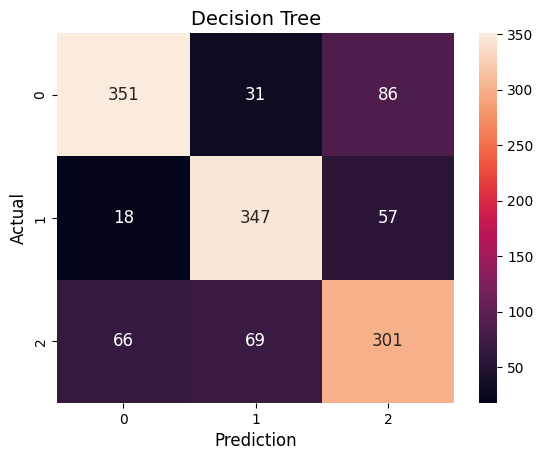

In [52]:
dt_cm = confusion_matrix(Y_test_smote,dt_pred_opt)
dt_cm = pd.DataFrame(dt_cm)
plt.figure()
sns_plot = sns.heatmap(dt_cm, annot=True,fmt='g', annot_kws={"fontsize":12})
plt.ylabel("Actual", fontsize=12)
plt.xlabel("Prediction",fontsize=12)
plt.title("Decision Tree",fontsize=14)

6. **Guardado de informes en Excel:** Se guardan los informes de clasificación del modelo original y del modelo optimizado en archivos Excel separados.

In [53]:
excel_report_dt = classification_report(Y_test_smote, dt_pred,output_dict=True)
excel_report_dt = pd.DataFrame(excel_report_dt).T 
excel_report_dt.to_excel(RESULTS_PATH+"/excel_report_dt.xlsx")

excel_report_dt_optuna = classification_report(Y_test_smote, dt_pred_opt,output_dict=True)
excel_report_dt_optuna = pd.DataFrame(excel_report_dt_optuna).T 
excel_report_dt_optuna.to_excel(RESULTS_PATH+"/excel_report_dt_optuna.xlsx")



## 2) Random Forest

1. **Entrenamiento y predicción:** Similar a la parte 1, pero utilizando un clasificador de bosque aleatorio.

In [54]:
rf = RandomForestClassifier(random_state=42)
rf = rf.fit(X_train_smote,Y_train_smote)
rf_pred = rf.predict(X_test_smote)

In [55]:
print(classification_report(Y_test_smote,rf_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       468
           1       0.82      0.89      0.85       422
           2       0.78      0.80      0.79       436

    accuracy                           0.83      1326
   macro avg       0.83      0.83      0.83      1326
weighted avg       0.83      0.83      0.83      1326



### Random Forest - Hyperparameter optimization using Optuna

2. **Optimización de hiperparámetros con Optuna:** Se busca optimizar los hiperparámetros (`max_depth`, `min_samples_leaf`, `criterion`) del bosque aleatorio.

In [56]:
def rf_objective(trial):
    
    md = trial.suggest_int('max_depth', 2, 64)
    mi = trial.suggest_int('min_samples_leaf', 1, 32)
    crit = trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])
    
    clf =  RandomForestClassifier(max_depth=md, min_samples_leaf=mi,criterion=crit, random_state=42, )
    scores = cross_val_score(clf, X_train_smote, Y_train_smote, cv=10, scoring='f1_weighted')
    
    return scores.mean()
    
rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(rf_objective, n_trials=20) 

[I 2024-02-07 16:23:23,196] A new study created in memory with name: no-name-41e7402b-a711-49da-b2f0-9b06fd53bcb1
[I 2024-02-07 16:23:36,422] Trial 0 finished with value: 0.8299595843094979 and parameters: {'max_depth': 61, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8299595843094979.
[I 2024-02-07 16:23:44,257] Trial 1 finished with value: 0.7874874194070275 and parameters: {'max_depth': 40, 'min_samples_leaf': 10, 'criterion': 'gini'}. Best is trial 0 with value: 0.8299595843094979.
[I 2024-02-07 16:23:50,312] Trial 2 finished with value: 0.7582153691327402 and parameters: {'max_depth': 12, 'min_samples_leaf': 30, 'criterion': 'gini'}. Best is trial 0 with value: 0.8299595843094979.
[I 2024-02-07 16:23:56,618] Trial 3 finished with value: 0.7782273163624549 and parameters: {'max_depth': 60, 'min_samples_leaf': 16, 'criterion': 'gini'}. Best is trial 0 with value: 0.8299595843094979.
[I 2024-02-07 16:24:03,572] Trial 4 finished with value: 0.783825462

In [57]:
print(rf_study.best_value)
print(rf_study.best_params)

0.8310047329360003
{'max_depth': 25, 'min_samples_leaf': 1, 'criterion': 'entropy'}


In [58]:
rf_opt = RandomForestClassifier(**rf_study.best_params, random_state=42)
rf_opt = rf_opt.fit(X_train_smote,Y_train_smote)
rf_pred_opt = rf_opt.predict(X_test_smote)

In [59]:
print(classification_report(Y_test_smote,rf_pred_opt))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       468
           1       0.83      0.90      0.86       422
           2       0.79      0.82      0.80       436

    accuracy                           0.84      1326
   macro avg       0.84      0.84      0.84      1326
weighted avg       0.84      0.84      0.84      1326



### Random Forest -  Confusion Matrix

3. **Evaluación del modelo optimizado y matriz de confusión:** Se evalúa el rendimiento del bosque aleatorio optimizado y se visualiza su matriz de confusión.

Text(0.5, 1.0, 'Random Forest')

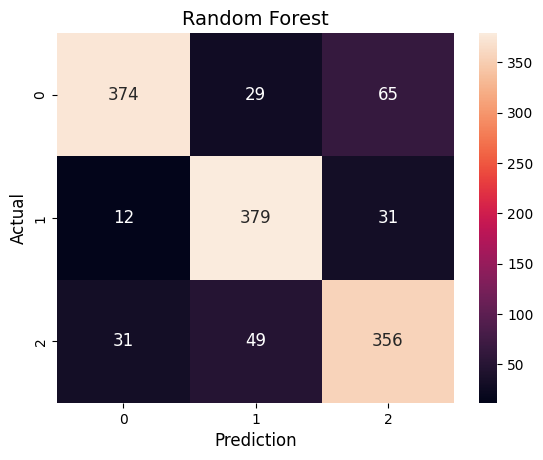

In [60]:
rf_cm = confusion_matrix(Y_test_smote,rf_pred_opt)
rf_cm = pd.DataFrame(rf_cm)
plt.figure()
sns_plot = sns.heatmap(rf_cm, annot=True,fmt='g', annot_kws={"fontsize":12})
plt.ylabel("Actual", fontsize=12)
plt.xlabel("Prediction",fontsize=12)
plt.title("Random Forest",fontsize=14)

4. **Guardado de informes en Excel:** Se guardan los informes de clasificación en Excel, tanto para el modelo original como para el optimizado.

In [61]:
excel_report_rf = classification_report(Y_test_smote, rf_pred,output_dict=True)
excel_report_rf = pd.DataFrame(excel_report_rf).T 
excel_report_rf.to_excel(RESULTS_PATH+"/excel_report_rf.xlsx")

excel_report_rf_optuna = classification_report(Y_test_smote, rf_pred_opt,output_dict=True)
excel_report_rf_optuna = pd.DataFrame(excel_report_rf_optuna).T 
excel_report_rf_optuna.to_excel(RESULTS_PATH+"/excel_report_rf_optuna.xlsx")

## 3) Support Vector Machine (SVM)

1. **Entrenamiento y predicción:** Se entrena un clasificador SVM y se realizan predicciones.

In [62]:
svm = SVC(random_state=42)
svm = svm.fit(X_train_smote,Y_train_smote)
svm_pred = svm.predict(X_test_smote)

In [63]:
print(classification_report(Y_test_smote,svm_pred))

              precision    recall  f1-score   support

           0       0.48      0.07      0.12       468
           1       0.33      0.98      0.49       422
           2       0.00      0.00      0.00       436

    accuracy                           0.34      1326
   macro avg       0.27      0.35      0.20      1326
weighted avg       0.27      0.34      0.20      1326



### SVM - Hyperparameter optimization using Optuna

2. **Optimización de hiperparámetros con Optuna:** Se optimizan los hiperparámetros (`C`, `kernel`, `gamma`, `degree`) del clasificador SVM.

In [64]:
 def svm_objective(trial):
    
    svc_c = trial.suggest_float("C", 1e-10, 1e10, log=True)
    kernel = trial.suggest_categorical('kernel', ['poly', 'rbf', 'sigmoid'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    degree = trial.suggest_int('degree', 1, 5)
    
    
    clf =  SVC(C = svc_c, kernel=kernel, gamma=gamma, degree=degree, random_state=42)
    scores = cross_val_score(clf, X_train_smote, Y_train_smote, cv=10, scoring='f1_weighted')
    
    return scores.mean()
    
svm_study = optuna.create_study(direction='maximize')
svm_study.optimize(svm_objective, n_trials=20)  

[I 2024-02-07 16:26:05,875] A new study created in memory with name: no-name-e0668cb3-dcef-4f85-a1a9-6d80fae37c15
[I 2024-02-07 16:26:12,955] Trial 0 finished with value: 0.30714994505496174 and parameters: {'C': 25195.399492361365, 'kernel': 'sigmoid', 'gamma': 'scale', 'degree': 1}. Best is trial 0 with value: 0.30714994505496174.
[I 2024-02-07 16:26:20,525] Trial 1 finished with value: 0.16998050413237867 and parameters: {'C': 5.366421327776774e-07, 'kernel': 'sigmoid', 'gamma': 'auto', 'degree': 3}. Best is trial 0 with value: 0.30714994505496174.
[I 2024-02-07 16:26:32,123] Trial 2 finished with value: 0.20159730094583814 and parameters: {'C': 0.7119148393706262, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 1}. Best is trial 0 with value: 0.30714994505496174.
[I 2024-02-07 16:26:39,969] Trial 3 finished with value: 0.16998050413237867 and parameters: {'C': 3.7629936031753664, 'kernel': 'sigmoid', 'gamma': 'auto', 'degree': 5}. Best is trial 0 with value: 0.30714994505496174.
[I 20

In [ ]:
print(svm_study.best_value)
print(svm_study.best_params)

0.8063145607515247
{'C': 3573556.518389481, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 4}


In [ ]:
svm_opt = SVC(**svm_study.best_params, random_state=42)
svm_opt = svm.fit(X_train_smote,Y_train_smote)
svm_pred_opt = svm.predict(X_test_smote)

In [ ]:
print(classification_report(Y_test_smote,svm_pred_opt))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79       456
           1       0.84      0.69      0.76       454
           2       0.64      0.72      0.68       416

    accuracy                           0.74      1326
   macro avg       0.75      0.74      0.74      1326
weighted avg       0.75      0.74      0.74      1326



3. **Evaluación del modelo optimizado y matriz de confusión:** Se evalúa el rendimiento del modelo SVM optimizado y se visualiza su matriz de confusión.

Text(0.5, 1.0, 'SVC')

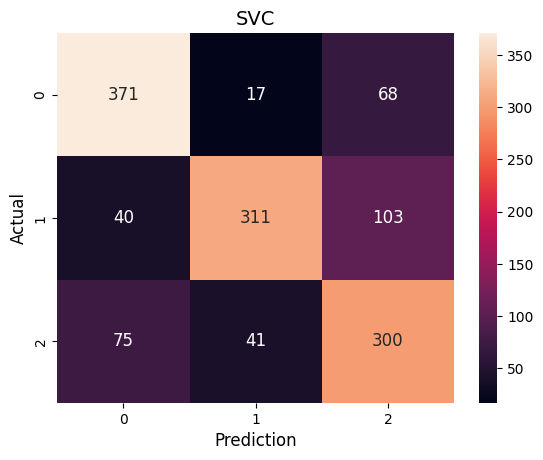

In [ ]:
svm_cm = confusion_matrix(Y_test_smote,svm_pred_opt)
svm_cm = pd.DataFrame(svm_cm)
plt.figure()
sns_plot = sns.heatmap(svm_cm, annot=True,fmt='g', annot_kws={"fontsize":12})
plt.ylabel("Actual", fontsize=12)
plt.xlabel("Prediction",fontsize=12)
plt.title("SVC",fontsize=14)

4. **Guardado de informes en Excel:** Se guardan los informes de clasificación para el modelo SVM original y el optimizado.

In [ ]:
excel_report_svm = classification_report(Y_test_smote, svm_pred,output_dict=True)
excel_report_svm = pd.DataFrame(excel_report_svm).T 
excel_report_svm.to_excel(RESULTS_PATH+"/excel_report_svm.xlsx")

excel_report_svm_optuna = classification_report(Y_test_smote, svm_pred_opt,output_dict=True)
excel_report_svm_optuna = pd.DataFrame(excel_report_svm_optuna).T 
excel_report_svm_optuna.to_excel(RESULTS_PATH+"/excel_report_svm_optuna.xlsx")

# PART 2 => 
## ML Supervised Models (boosting algorithms)

## 1) Gradient Boosting

In [ ]:
gd = GradientBoostingClassifier(random_state=42)
gd = gd.fit(X_train_smote, Y_train_smote)
gd_pred = gd.predict(X_test_smote)

In [ ]:
print(classification_report(Y_test_smote, gd_pred)) # real / predito

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       456
           1       0.89      0.81      0.85       454
           2       0.74      0.79      0.76       416

    accuracy                           0.81      1326
   macro avg       0.81      0.81      0.81      1326
weighted avg       0.82      0.81      0.81      1326



In [ ]:
def gd_objective(trial):
    param = {
        'verbose': 0,
        "loss": trial.suggest_categorical("loss", ["log_loss", "deviance"]),
        "criterion": trial.suggest_categorical("criterion", ["friedman_mse", "squared_error"]),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        "random_state": 42
    }

    clf = GradientBoostingClassifier(**param)
    scores = cross_val_score(clf, X_train_smote, Y_train_smote, cv=10,
    scoring='f1_weighted')

    return scores.mean()

gd_study = optuna.create_study(direction='maximize')
gd_study.optimize(gd_objective, n_trials=20)

[I 2023-05-01 08:49:10,099] A new study created in memory with name: no-name-2e0f262a-6ec1-4aaf-8afb-fb403e894f69
[I 2023-05-01 08:49:53,868] Trial 0 finished with value: 0.7346687093619255 and parameters: {'loss': 'deviance', 'criterion': 'friedman_mse', 'learning_rate': 0.00601419873567446, 'subsample': 0.991508753243568}. Best is trial 0 with value: 0.7346687093619255.
[I 2023-05-01 08:50:23,059] Trial 1 finished with value: 0.7268605097705152 and parameters: {'loss': 'log_loss', 'criterion': 'friedman_mse', 'learning_rate': 0.0017974647601922441, 'subsample': 0.5698493174903145}. Best is trial 0 with value: 0.7346687093619255.
[I 2023-05-01 08:50:54,711] Trial 2 finished with value: 0.803791358816475 and parameters: {'loss': 'log_loss', 'criterion': 'squared_error', 'learning_rate': 0.3310007808017887, 'subsample': 0.5177009387455265}. Best is trial 2 with value: 0.803791358816475.
[I 2023-05-01 08:51:28,598] Trial 3 finished with value: 0.7202933569717065 and parameters: {'loss': 

In [ ]:
print(gd_study.best_value)
print(gd_study.best_params)

0.8107727610036296
{'loss': 'log_loss', 'criterion': 'squared_error', 'learning_rate': 0.26148154088923287, 'subsample': 0.694951061813321}


In [ ]:
#rodando o SVM com os parametros que ele encontrou = RandomForestClassifier(max_depth = 27, min_samples_leaf = 1, criterion='log_loss', random_state=42)
gd_opt = GradientBoostingClassifier(**gd_study.best_params)
gd_opt = gd_opt.fit(X_train_smote,Y_train_smote)
gd_pred_opt = gd.predict(X_test_smote)

In [ ]:
print(classification_report(Y_test_smote, gd_pred_opt))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       456
           1       0.89      0.81      0.85       454
           2       0.74      0.79      0.76       416

    accuracy                           0.81      1326
   macro avg       0.81      0.81      0.81      1326
weighted avg       0.82      0.81      0.81      1326



In [ ]:
# Creating excell file -> Gradient Boosting & Gradient Boosting + Optuna 
excel_report_gd = classification_report(Y_test_smote, gd_pred,output_dict=True)
excel_report_gd = pd.DataFrame(excel_report_gd).T 
excel_report_gd.to_excel(RESULTS_PATH+"/excel_report_gd.xlsx")


excel_report_gd_optuna = classification_report(Y_test_smote, gd_pred_opt,output_dict=True)
excel_report_gd_optuna = pd.DataFrame(excel_report_gd_optuna).T 
excel_report_gd_optuna.to_excel(RESULTS_PATH+"/excel_report_gd_optuna.xlsx")

## 2) Extreme Gradient Boosting (XGBoost)

In [ ]:
xgd = XGBClassifier(random_state=42)
xgd = xgd.fit(X_train_smote, Y_train_smote)
xgd_pred = xgd.predict(X_test_smote)

In [ ]:
print(classification_report(Y_test_smote, xgd_pred)) # real / predito

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       456
           1       0.91      0.85      0.88       454
           2       0.81      0.85      0.83       416

    accuracy                           0.86      1326
   macro avg       0.86      0.86      0.86      1326
weighted avg       0.86      0.86      0.86      1326



In [ ]:

def xgb_objective(trial):
    dtrain = xgb.DMatrix(X_train_smote, label=Y_train_smote)
    dvalid = xgb.DMatrix(X_test_smote, label=Y_test_smote)

    param = {"verbosity": 0,
        "objective": "multi:softmax",
        "num_class": 3,
        "booster": trial.suggest_categorical("booster", ["gbtree", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
        "scale_pos_weight": trial.suggest_float('scale_pos_weight',1,198),
        'eval_metric': 'mlogloss'}

    if param["booster"] in ["gbtree", "dart"]:
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)


    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-mlogloss")
    bst = xgb.train(param, dtrain, evals=[(dvalid, "validation")], callbacks=[pruning_callback])
    preds = bst.predict(dvalid)
    pred_labels = np.rint(preds)
    f1_score_xgb = f1_score(Y_test_smote, pred_labels, average='weighted')
    return f1_score_xgb

In [ ]:
xgb_study = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=5), direction="maximize"
    )
xgb_study.optimize(xgb_objective, n_trials=20)

[I 2023-05-01 10:43:06,892] A new study created in memory with name: no-name-1f3f5a44-6c93-44fd-b4fc-729fcd1dea06


[0]	validation-mlogloss:1.09861
[1]	validation-mlogloss:1.09860
[2]	validation-mlogloss:1.09860
[3]	validation-mlogloss:1.09859
[4]	validation-mlogloss:1.09859
[5]	validation-mlogloss:1.09858
[6]	validation-mlogloss:1.09858
[7]	validation-mlogloss:1.09857
[8]	validation-mlogloss:1.09856
[9]	validation-mlogloss:1.09856


[I 2023-05-01 10:43:07,084] Trial 0 finished with value: 0.8030213612645909 and parameters: {'booster': 'gbtree', 'lambda': 0.002993925069597247, 'alpha': 1.4880958846981337e-08, 'subsample': 0.6418659351895109, 'colsample_bytree': 0.44471910063621406, 'scale_pos_weight': 193.24773063498506, 'max_depth': 9, 'min_child_weight': 4, 'eta': 7.923910710470051e-06, 'gamma': 0.021874546514965783, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.8030213612645909.


[0]	validation-mlogloss:1.09834
[1]	validation-mlogloss:1.09806
[2]	validation-mlogloss:1.09774
[3]	validation-mlogloss:1.09760
[4]	validation-mlogloss:1.09745
[5]	validation-mlogloss:1.09717
[6]	validation-mlogloss:1.09688
[7]	validation-mlogloss:1.09659
[8]	validation-mlogloss:1.09649
[9]	validation-mlogloss:1.09643


[I 2023-05-01 10:43:07,335] Trial 1 finished with value: 0.7900713873466895 and parameters: {'booster': 'dart', 'lambda': 8.256415729794806e-06, 'alpha': 4.750557829880431e-08, 'subsample': 0.33576566088846693, 'colsample_bytree': 0.6623976709178889, 'scale_pos_weight': 173.44648283640754, 'max_depth': 9, 'min_child_weight': 5, 'eta': 0.00041790674138606794, 'gamma': 0.6998092445289119, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.08908160651569043, 'skip_drop': 0.00014286883593694118}. Best is trial 0 with value: 0.8030213612645909.


[0]	validation-mlogloss:1.09729
[1]	validation-mlogloss:1.09616
[2]	validation-mlogloss:1.09504
[3]	validation-mlogloss:1.09425
[4]	validation-mlogloss:1.09329
[5]	validation-mlogloss:1.09231
[6]	validation-mlogloss:1.09127
[7]	validation-mlogloss:1.09009
[8]	validation-mlogloss:1.08840
[9]	validation-mlogloss:1.08742


[I 2023-05-01 10:43:07,426] Trial 2 finished with value: 0.7605415493512406 and parameters: {'booster': 'gbtree', 'lambda': 0.00938036151929986, 'alpha': 2.611966959211925e-07, 'subsample': 0.6836831110485955, 'colsample_bytree': 0.21105831793484944, 'scale_pos_weight': 182.5989739376816, 'max_depth': 5, 'min_child_weight': 3, 'eta': 0.002784840167758259, 'gamma': 0.22035789355426583, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.8030213612645909.


[0]	validation-mlogloss:1.09250
[1]	validation-mlogloss:1.08547
[2]	validation-mlogloss:1.08058
[3]	validation-mlogloss:1.07497
[4]	validation-mlogloss:1.06839
[5]	validation-mlogloss:1.06316
[6]	validation-mlogloss:1.05768
[7]	validation-mlogloss:1.05144
[8]	validation-mlogloss:1.04476
[9]	validation-mlogloss:1.03924


[I 2023-05-01 10:43:07,612] Trial 3 finished with value: 0.7652256072400905 and parameters: {'booster': 'dart', 'lambda': 0.3599439798365469, 'alpha': 2.1640326902873822e-07, 'subsample': 0.5272716494918166, 'colsample_bytree': 0.39787220291215014, 'scale_pos_weight': 147.34849753667075, 'max_depth': 5, 'min_child_weight': 8, 'eta': 0.012179305763749464, 'gamma': 4.824892594000118e-08, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.5543244886911466, 'skip_drop': 8.810815033520929e-06}. Best is trial 0 with value: 0.8030213612645909.


[0]	validation-mlogloss:1.04956
[1]	validation-mlogloss:1.01597
[2]	validation-mlogloss:0.98490
[3]	validation-mlogloss:0.96323
[4]	validation-mlogloss:0.93703
[5]	validation-mlogloss:0.90718
[6]	validation-mlogloss:0.88721
[7]	validation-mlogloss:0.86227
[8]	validation-mlogloss:0.83938
[9]	validation-mlogloss:0.82403


[I 2023-05-01 10:43:07,698] Trial 4 finished with value: 0.7519526464319191 and parameters: {'booster': 'gbtree', 'lambda': 3.200474580649765e-05, 'alpha': 3.45147733979167e-07, 'subsample': 0.8197182657774664, 'colsample_bytree': 0.39589074321199, 'scale_pos_weight': 44.22002550689687, 'max_depth': 3, 'min_child_weight': 9, 'eta': 0.0918089333262326, 'gamma': 0.011294547621543864, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.8030213612645909.


[0]	validation-mlogloss:1.05956
[1]	validation-mlogloss:1.02253
[2]	validation-mlogloss:0.98454
[3]	validation-mlogloss:0.95291
[4]	validation-mlogloss:0.92387
[5]	validation-mlogloss:0.89765


[I 2023-05-01 10:43:07,810] Trial 5 pruned. Trial was pruned at iteration 5.


[0]	validation-mlogloss:1.08899
[1]	validation-mlogloss:1.07958
[2]	validation-mlogloss:1.07044
[3]	validation-mlogloss:1.06139
[4]	validation-mlogloss:1.05252
[5]	validation-mlogloss:1.04363


[I 2023-05-01 10:43:07,956] Trial 6 pruned. Trial was pruned at iteration 5.


[0]	validation-mlogloss:1.09861
[1]	validation-mlogloss:1.09861
[2]	validation-mlogloss:1.09861
[3]	validation-mlogloss:1.09861
[4]	validation-mlogloss:1.09861
[5]	validation-mlogloss:1.09861
[6]	validation-mlogloss:1.09861
[7]	validation-mlogloss:1.09861
[8]	validation-mlogloss:1.09861
[9]	validation-mlogloss:1.09861


[I 2023-05-01 10:43:08,147] Trial 7 finished with value: 0.17599829364535247 and parameters: {'booster': 'dart', 'lambda': 0.11262019698305326, 'alpha': 0.10470743291534115, 'subsample': 0.7046429934706266, 'colsample_bytree': 0.5822804142700102, 'scale_pos_weight': 21.213793162728475, 'max_depth': 3, 'min_child_weight': 5, 'eta': 1.545058809688437e-08, 'gamma': 1.0195421704477324e-05, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.1622385718762392e-06, 'skip_drop': 4.7740899689336656e-08}. Best is trial 0 with value: 0.8030213612645909.


[0]	validation-mlogloss:1.09861
[1]	validation-mlogloss:1.09860
[2]	validation-mlogloss:1.09859
[3]	validation-mlogloss:1.09859
[4]	validation-mlogloss:1.09858
[5]	validation-mlogloss:1.09857
[6]	validation-mlogloss:1.09857
[7]	validation-mlogloss:1.09856
[8]	validation-mlogloss:1.09856
[9]	validation-mlogloss:1.09855


[I 2023-05-01 10:43:08,293] Trial 8 finished with value: 0.7746746989112067 and parameters: {'booster': 'gbtree', 'lambda': 0.052409940343432874, 'alpha': 7.842921083230672e-06, 'subsample': 0.6263897148631379, 'colsample_bytree': 0.6002719189248134, 'scale_pos_weight': 53.88656561246787, 'max_depth': 5, 'min_child_weight': 4, 'eta': 9.949699210544768e-06, 'gamma': 1.556651340662533e-06, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.8030213612645909.


[0]	validation-mlogloss:1.09820
[1]	validation-mlogloss:1.09781
[2]	validation-mlogloss:1.09742
[3]	validation-mlogloss:1.09701
[4]	validation-mlogloss:1.09659
[5]	validation-mlogloss:1.09618
[6]	validation-mlogloss:1.09583
[7]	validation-mlogloss:1.09544
[8]	validation-mlogloss:1.09503
[9]	validation-mlogloss:1.09464


[I 2023-05-01 10:43:08,403] Trial 9 finished with value: 0.7490188686224587 and parameters: {'booster': 'gbtree', 'lambda': 0.01740587474533169, 'alpha': 0.00034156803520969285, 'subsample': 0.730806337295199, 'colsample_bytree': 0.8012448826011331, 'scale_pos_weight': 132.1166980656246, 'max_depth': 3, 'min_child_weight': 7, 'eta': 0.0006900885743901603, 'gamma': 0.08556489617254164, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.8030213612645909.


[0]	validation-mlogloss:1.09861
[1]	validation-mlogloss:1.09860
[2]	validation-mlogloss:1.09860
[3]	validation-mlogloss:1.09859
[4]	validation-mlogloss:1.09859
[5]	validation-mlogloss:1.09858
[6]	validation-mlogloss:1.09858
[7]	validation-mlogloss:1.09857
[8]	validation-mlogloss:1.09857
[9]	validation-mlogloss:1.09856


[I 2023-05-01 10:43:08,645] Trial 10 finished with value: 0.7894553935776892 and parameters: {'booster': 'gbtree', 'lambda': 0.000873600738293406, 'alpha': 3.1611213268594726e-08, 'subsample': 0.9735050579804063, 'colsample_bytree': 0.9979872770911917, 'scale_pos_weight': 103.87080240750538, 'max_depth': 7, 'min_child_weight': 2, 'eta': 6.228716524406276e-06, 'gamma': 0.0008968118140175305, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.8030213612645909.


[0]	validation-mlogloss:1.09856
[1]	validation-mlogloss:1.09850
[2]	validation-mlogloss:1.09844
[3]	validation-mlogloss:1.09838
[4]	validation-mlogloss:1.09833
[5]	validation-mlogloss:1.09827
[6]	validation-mlogloss:1.09822
[7]	validation-mlogloss:1.09818
[8]	validation-mlogloss:1.09812
[9]	validation-mlogloss:1.09807


[I 2023-05-01 10:43:08,962] Trial 11 finished with value: 0.7885835936231205 and parameters: {'booster': 'dart', 'lambda': 1.2474765309925095e-05, 'alpha': 3.254753116714042e-08, 'subsample': 0.464862966105301, 'colsample_bytree': 0.5549293188184008, 'scale_pos_weight': 191.99226583425997, 'max_depth': 9, 'min_child_weight': 5, 'eta': 8.096432918254507e-05, 'gamma': 0.9651356412570975, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.08323377096464091, 'skip_drop': 0.5080614179194087}. Best is trial 0 with value: 0.8030213612645909.


[0]	validation-mlogloss:0.73054
[1]	validation-mlogloss:0.62512
[2]	validation-mlogloss:0.56648
[3]	validation-mlogloss:0.55930
[4]	validation-mlogloss:0.54644


[I 2023-05-01 10:43:09,131] Trial 12 pruned. Trial was pruned at iteration 5.


[0]	validation-mlogloss:1.09854
[1]	validation-mlogloss:1.09846
[2]	validation-mlogloss:1.09837
[3]	validation-mlogloss:1.09830
[4]	validation-mlogloss:1.09822
[5]	validation-mlogloss:1.09814
[6]	validation-mlogloss:1.09806
[7]	validation-mlogloss:1.09799
[8]	validation-mlogloss:1.09789
[9]	validation-mlogloss:1.09782


[I 2023-05-01 10:43:09,392] Trial 13 finished with value: 0.7696704826757684 and parameters: {'booster': 'dart', 'lambda': 0.0005720874408848438, 'alpha': 1.4043225324557584e-08, 'subsample': 0.26761361505230225, 'colsample_bytree': 0.48854544166472225, 'scale_pos_weight': 197.04910485593672, 'max_depth': 7, 'min_child_weight': 6, 'eta': 0.00013281685420230425, 'gamma': 0.9980319427802997, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.0007214551669885202, 'skip_drop': 5.795471113494491e-07}. Best is trial 0 with value: 0.8030213612645909.


[0]	validation-mlogloss:1.09861
[1]	validation-mlogloss:1.09861
[2]	validation-mlogloss:1.09861
[3]	validation-mlogloss:1.09861
[4]	validation-mlogloss:1.09861
[5]	validation-mlogloss:1.09861
[6]	validation-mlogloss:1.09861
[7]	validation-mlogloss:1.09861
[8]	validation-mlogloss:1.09860
[9]	validation-mlogloss:1.09860


[I 2023-05-01 10:43:09,601] Trial 14 finished with value: 0.7784355464141596 and parameters: {'booster': 'gbtree', 'lambda': 3.1844656768235153e-06, 'alpha': 6.369896126807484e-06, 'subsample': 0.5097175091215047, 'colsample_bytree': 0.667437242672608, 'scale_pos_weight': 163.32419685343976, 'max_depth': 7, 'min_child_weight': 10, 'eta': 1.2102354314094313e-06, 'gamma': 0.0006041552453736222, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.8030213612645909.


[0]	validation-mlogloss:1.09837
[1]	validation-mlogloss:1.09810
[2]	validation-mlogloss:1.09781
[3]	validation-mlogloss:1.09756
[4]	validation-mlogloss:1.09728
[5]	validation-mlogloss:1.09700
[6]	validation-mlogloss:1.09675
[7]	validation-mlogloss:1.09649
[8]	validation-mlogloss:1.09618
[9]	validation-mlogloss:1.09593


[I 2023-05-01 10:43:09,928] Trial 15 finished with value: 0.7732391564462877 and parameters: {'booster': 'dart', 'lambda': 0.004474204109714026, 'alpha': 9.844185387915543e-05, 'subsample': 0.20027382121992474, 'colsample_bytree': 0.44626912140124164, 'scale_pos_weight': 131.6376895299796, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.00044574103602409293, 'gamma': 0.019101562388317624, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.017629980019997445, 'skip_drop': 0.003327519745286033}. Best is trial 0 with value: 0.8030213612645909.


[0]	validation-mlogloss:1.09861
[1]	validation-mlogloss:1.09861
[2]	validation-mlogloss:1.09861
[3]	validation-mlogloss:1.09861
[4]	validation-mlogloss:1.09861
[5]	validation-mlogloss:1.09861
[6]	validation-mlogloss:1.09861
[7]	validation-mlogloss:1.09861
[8]	validation-mlogloss:1.09861
[9]	validation-mlogloss:1.09861


[I 2023-05-01 10:43:10,131] Trial 16 finished with value: 0.7768897629464996 and parameters: {'booster': 'gbtree', 'lambda': 0.5846502639399167, 'alpha': 1.1871339794960402e-08, 'subsample': 0.40529864946683936, 'colsample_bytree': 0.34594797645990893, 'scale_pos_weight': 168.78429494894652, 'max_depth': 7, 'min_child_weight': 2, 'eta': 4.0647391322881443e-07, 'gamma': 0.01665750072000984, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.8030213612645909.


[0]	validation-mlogloss:1.09858
[1]	validation-mlogloss:1.09855
[2]	validation-mlogloss:1.09852
[3]	validation-mlogloss:1.09849
[4]	validation-mlogloss:1.09846
[5]	validation-mlogloss:1.09843
[6]	validation-mlogloss:1.09840
[7]	validation-mlogloss:1.09837
[8]	validation-mlogloss:1.09834
[9]	validation-mlogloss:1.09831


[I 2023-05-01 10:43:10,446] Trial 17 finished with value: 0.7962754129314463 and parameters: {'booster': 'dart', 'lambda': 7.983608497277808e-05, 'alpha': 1.2030064286325578e-06, 'subsample': 0.5758650212800113, 'colsample_bytree': 0.5087956520979665, 'scale_pos_weight': 196.82137662625507, 'max_depth': 9, 'min_child_weight': 6, 'eta': 4.533352043969618e-05, 'gamma': 0.0001352603751354947, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 2.0134158136978112e-05, 'skip_drop': 1.172044202208233e-08}. Best is trial 0 with value: 0.8030213612645909.


[0]	validation-mlogloss:1.09858
[1]	validation-mlogloss:1.09855
[2]	validation-mlogloss:1.09852
[3]	validation-mlogloss:1.09850
[4]	validation-mlogloss:1.09847
[5]	validation-mlogloss:1.09843
[6]	validation-mlogloss:1.09841
[7]	validation-mlogloss:1.09838
[8]	validation-mlogloss:1.09835
[9]	validation-mlogloss:1.09832


[I 2023-05-01 10:43:10,642] Trial 18 finished with value: 0.7872395351522128 and parameters: {'booster': 'gbtree', 'lambda': 6.293518714429082e-05, 'alpha': 1.2889878246794262e-06, 'subsample': 0.5836115474539574, 'colsample_bytree': 0.5010821311912608, 'scale_pos_weight': 197.75213370369752, 'max_depth': 9, 'min_child_weight': 7, 'eta': 4.4347590051961055e-05, 'gamma': 7.767442767395894e-05, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.8030213612645909.


[0]	validation-mlogloss:1.09861
[1]	validation-mlogloss:1.09860
[2]	validation-mlogloss:1.09860
[3]	validation-mlogloss:1.09859
[4]	validation-mlogloss:1.09859
[5]	validation-mlogloss:1.09858
[6]	validation-mlogloss:1.09858
[7]	validation-mlogloss:1.09857
[8]	validation-mlogloss:1.09857
[9]	validation-mlogloss:1.09856


[I 2023-05-01 10:43:10,932] Trial 19 finished with value: 0.7803840196112666 and parameters: {'booster': 'dart', 'lambda': 0.002120044157572614, 'alpha': 7.330587599649357e-07, 'subsample': 0.6116811655787756, 'colsample_bytree': 0.33104062964999914, 'scale_pos_weight': 149.37854024222364, 'max_depth': 7, 'min_child_weight': 6, 'eta': 9.852652021880762e-06, 'gamma': 0.00017768963102542993, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 9.646034670043036e-06, 'skip_drop': 3.6964461151511626e-08}. Best is trial 0 with value: 0.8030213612645909.


In [ ]:
print(xgb_study.best_value)
print(xgb_study.best_params)

0.8030213612645909
{'booster': 'gbtree', 'lambda': 0.002993925069597247, 'alpha': 1.4880958846981337e-08, 'subsample': 0.6418659351895109, 'colsample_bytree': 0.44471910063621406, 'scale_pos_weight': 193.24773063498506, 'max_depth': 9, 'min_child_weight': 4, 'eta': 7.923910710470051e-06, 'gamma': 0.021874546514965783, 'grow_policy': 'depthwise'}


In [ ]:
xgb_opt = XGBClassifier(**xgb_study.best_params)
xgb_opt = xgb_opt.fit(X_train_smote, Y_train_smote)
xgb_pred_opt = xgb_opt.predict(X_test_smote)

In [ ]:
print(classification_report(Y_test_smote, xgb_pred_opt)) # real / predito

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       456
           1       0.88      0.77      0.82       454
           2       0.72      0.79      0.75       416

    accuracy                           0.79      1326
   macro avg       0.80      0.79      0.79      1326
weighted avg       0.80      0.79      0.80      1326



In [ ]:
# Creating excell file -> XGBoost & XGBoost + Optuna 
excel_report_xgb = classification_report(Y_test_smote, xgb_pred,output_dict=True)
excel_report_xgb = pd.DataFrame(excel_report_xgb).T 
excel_report_xgb.to_excel(RESULTS_PATH+"/excel_report_xgb.xlsx")


excel_report_xgb_optuna = classification_report(Y_test_smote, xgb_pred_opt,output_dict=True)
excel_report_xgb_optuna = pd.DataFrame(excel_report_xgb_optuna).T 
excel_report_xgb_optuna.to_excel(RESULTS_PATH+"/excel_report_xgd_optuna.xlsx")

## 3) CatBoost (CB)

In [ ]:
cat = CatBoostClassifier(random_state = 42, verbose = 0)
cat = cat.fit(X_train_smote, Y_train_smote)
cat_pred = cat.predict(X_test_smote)

In [ ]:
print(classification_report(Y_test_smote, cat_pred)) # real / predito

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       450
           1       0.87      0.79      0.83       445
           2       0.77      0.83      0.80       431

    accuracy                           0.82      1326
   macro avg       0.82      0.82      0.82      1326
weighted avg       0.82      0.82      0.82      1326



In [ ]:
def cat_objective(trial):
    
    model = CatBoostClassifier(
        loss_function="MultiClass",
        iterations=trial.suggest_int("iterations", 100, 1000),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        verbose=False,
 
    )
    scores = cross_val_score(model, X_train_smote, Y_train_smote, cv=10, scoring='f1_weighted')
    
    return scores.mean()
    
cat_study = optuna.create_study(direction='maximize')
cat_study.optimize(cat_objective, n_trials=20)
        
        
        

[I 2023-09-05 10:44:25,146] A new study created in memory with name: no-name-963d1ee3-cddc-4fa0-a924-38aed93786fa
[I 2023-09-05 10:46:01,788] Trial 0 finished with value: 0.7677155663463362 and parameters: {'iterations': 166, 'learning_rate': 0.017699687908190508, 'depth': 9}. Best is trial 0 with value: 0.7677155663463362.
[I 2023-09-05 10:53:52,865] Trial 1 finished with value: 0.7463539171726097 and parameters: {'iterations': 707, 'learning_rate': 0.0018686124428975803, 'depth': 9}. Best is trial 0 with value: 0.7677155663463362.
[I 2023-09-05 10:56:02,629] Trial 2 finished with value: 0.7570607822949923 and parameters: {'iterations': 421, 'learning_rate': 0.008239658638543113, 'depth': 7}. Best is trial 0 with value: 0.7677155663463362.
[I 2023-09-05 10:58:28,280] Trial 3 finished with value: 0.7556521617025087 and parameters: {'iterations': 969, 'learning_rate': 0.006580174045674134, 'depth': 4}. Best is trial 0 with value: 0.7677155663463362.
[I 2023-09-05 10:59:09,053] Trial 4 f

In [ ]:
print(cat_study.best_value)
print(cat_study.best_params)

0.8421323266291395
{'iterations': 568, 'learning_rate': 0.09993687369269594, 'depth': 8}


In [ ]:
cat_opt = CatBoostClassifier(**cat_study.best_params, verbose=0)
cat_opt = cat_opt.fit(X_train_smote, Y_train_smote)
cat_pred_opt = cat_opt.predict(X_test_smote)

In [ ]:
print(classification_report(Y_test_smote, cat_pred_opt)) # real / predito

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       450
           1       0.89      0.81      0.85       445
           2       0.80      0.84      0.82       431

    accuracy                           0.84      1326
   macro avg       0.84      0.84      0.84      1326
weighted avg       0.84      0.84      0.84      1326



In [ ]:
# Creating excell file -> CatBoost & CatBoost + Optuna 
excel_report_cat = classification_report(Y_test_smote, cat_pred,output_dict=True)
excel_report_cat = pd.DataFrame(excel_report_cat).T 
excel_report_cat.to_excel(RESULTS_PATH+"/excel_report_cat.xlsx")


excel_report_cat_optuna = classification_report(Y_test_smote, cat_pred_opt,output_dict=True)
excel_report_cat_optuna = pd.DataFrame(excel_report_cat_optuna).T 
excel_report_cat_optuna.to_excel(RESULTS_PATH+"/excel_report_cat_optuna.xlsx")

## ROC Curve - Catboost (CB)

In [ ]:
label_binarizer = LabelBinarizer().fit(Y_train_smote)
y_onehot_test = label_binarizer.transform(Y_test_smote)
y_onehot_test.shape 

(1326, 3)

In [ ]:
cat_pred_opt_proba = cat_opt.predict_proba(X_test_smote)
fpr, tpr, roc_auc = dict(), dict(), dict()
n_classes = len(Y_test_smote.unique())
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], cat_pred_opt_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  

mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.95


In [ ]:
pair_list = list(combinations(np.unique(Y_smote), 2))
print(pair_list)

[(0, 1), (0, 2), (1, 2)]


In [ ]:
macro_roc_auc_ovo = roc_auc_score(
    Y_test_smote,
    cat_pred_opt_proba,
    multi_class="ovo",
    average="macro",
)

print(f"Macro-averaged One-vs-One ROC AUC score:\n{macro_roc_auc_ovo:.2f}")

Macro-averaged One-vs-One ROC AUC score:
0.95


In [ ]:
pair_scores = []
mean_tpr = dict()

for ix, (label_a, label_b) in enumerate(pair_list):
    a_mask = Y_test_smote == label_a
    b_mask = Y_test_smote == label_b
    ab_mask = np.logical_or(a_mask, b_mask)

    a_true = a_mask[ab_mask]
    b_true = b_mask[ab_mask]

    idx_a = np.flatnonzero(label_binarizer.classes_ == label_a)[0]
    idx_b = np.flatnonzero(label_binarizer.classes_ == label_b)[0]

    fpr_a, tpr_a, _ = roc_curve(a_true, cat_pred_opt_proba[ab_mask, idx_a])
    fpr_b, tpr_b, _ = roc_curve(b_true, cat_pred_opt_proba[ab_mask, idx_b])

    mean_tpr[ix] = np.zeros_like(fpr_grid)
    mean_tpr[ix] += np.interp(fpr_grid, fpr_a, tpr_a)
    mean_tpr[ix] += np.interp(fpr_grid, fpr_b, tpr_b)
    mean_tpr[ix] /= 2
    mean_score = auc(fpr_grid, mean_tpr[ix])
    pair_scores.append(mean_score)

In [ ]:
names = {1:'Dropout',
    2:'Enrolled',
    0:'Graduate'}

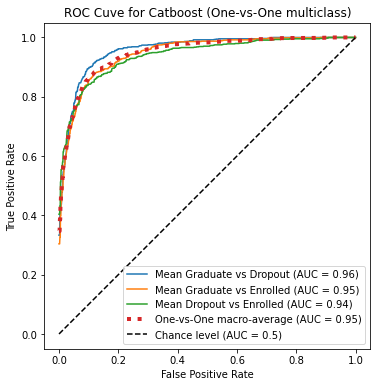

In [ ]:
ovo_tpr = np.zeros_like(fpr_grid)

fig, ax = plt.subplots(figsize=(6, 6))
for ix, (label_a, label_b) in enumerate(pair_list):
    ovo_tpr += mean_tpr[ix]
    plt.plot(
        fpr_grid,
        mean_tpr[ix],
        label=f"Mean {names[label_a]} vs {names[label_b]} (AUC = {pair_scores[ix]:.2f})",
    )

ovo_tpr /= sum(1 for pair in enumerate(pair_list))

plt.plot(
    fpr_grid,
    ovo_tpr,
    label=f"One-vs-One macro-average (AUC = {macro_roc_auc_ovo:.2f})",
    linestyle=":",
    linewidth=4,
)
plt.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Cuve for Catboost (One-vs-One multiclass)")
plt.legend()
plt.savefig('roc_catboost.png',dpi=300, bbox_inches = "tight")
plt.show()


## 4) LightGBM (LB) 

In [ ]:
lgbm = ltb.LGBMClassifier(random_state=42)
lgbm = lgbm.fit(X_train_smote, Y_train_smote)
lgbm_pred = lgbm.predict(X_test_smote)

In [ ]:
print(classification_report(Y_test_smote,lgbm_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       450
           1       0.85      0.81      0.83       445
           2       0.79      0.81      0.80       431

    accuracy                           0.82      1326
   macro avg       0.82      0.82      0.82      1326
weighted avg       0.82      0.82      0.82      1326



In [ ]:
def objective_lightgbm(trial):
    #dtrain = ltb.Dataset(X_train_smote.astype('float32'), label=Y_train_smote.astype('float32'))
    #dvalid = ltb.Dataset(X_train_smote.astype('float32'), label=Y_train_smote.astype('float32'))
    param = {
        "objective": "multiclass",
        "num_class": 3,
        "metric": "multi_logloss",
        "verbosity": -1 ,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
       "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    
    model = ltb.LGBMClassifier(**param,random_state=42)
    scores = cross_val_score(model, X_train_smote, Y_train_smote, cv = 10, scoring = "f1_weighted")
     
    return scores.mean()
    
    
study_lightgbm = optuna.create_study(direction="maximize")
study_lightgbm.optimize(objective_lightgbm, n_trials=20)
    

[I 2023-09-05 14:06:05,242] A new study created in memory with name: no-name-7cca4401-40e2-46f2-b52d-9ca6f4b03af1


[LightGBM] [Warning] feature_fraction is set=0.45461159327378337, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45461159327378337
[LightGBM] [Warning] lambda_l1 is set=1.3935564080139712e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3935564080139712e-05
[LightGBM] [Warning] bagging_fraction is set=0.5037217115035042, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5037217115035042
[LightGBM] [Warning] lambda_l2 is set=5.010324127269617e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.010324127269617e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.45461159327378337, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45461159327378337
[LightGBM] [Warning] lambda_l1 is set=1.3935564080139712e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3935564080139712e-05
[LightGBM] 

[I 2023-09-05 14:06:51,555] Trial 0 finished with value: 0.8395644122954558 and parameters: {'lambda_l1': 1.3935564080139712e-05, 'lambda_l2': 5.010324127269617e-06, 'num_leaves': 212, 'feature_fraction': 0.45461159327378337, 'bagging_fraction': 0.5037217115035042, 'bagging_freq': 3, 'min_child_samples': 6}. Best is trial 0 with value: 0.8395644122954558.


[LightGBM] [Warning] feature_fraction is set=0.9056472089911745, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9056472089911745
[LightGBM] [Warning] lambda_l1 is set=6.770501814175282e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.770501814175282e-05
[LightGBM] [Warning] bagging_fraction is set=0.7838170566855454, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7838170566855454
[LightGBM] [Warning] lambda_l2 is set=0.109752618148311, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.109752618148311
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9056472089911745, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9056472089911745
[LightGBM] [Warning] lambda_l1 is set=6.770501814175282e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.770501814175282e-05
[LightGBM] [Warning] baggin

[I 2023-09-05 14:07:03,179] Trial 1 finished with value: 0.8316387511496787 and parameters: {'lambda_l1': 6.770501814175282e-05, 'lambda_l2': 0.109752618148311, 'num_leaves': 33, 'feature_fraction': 0.9056472089911745, 'bagging_fraction': 0.7838170566855454, 'bagging_freq': 4, 'min_child_samples': 71}. Best is trial 0 with value: 0.8395644122954558.


[LightGBM] [Warning] feature_fraction is set=0.4009119446988637, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4009119446988637
[LightGBM] [Warning] lambda_l1 is set=0.007251812479805431, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007251812479805431
[LightGBM] [Warning] bagging_fraction is set=0.9939080058914899, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9939080058914899
[LightGBM] [Warning] lambda_l2 is set=0.7241122692545219, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7241122692545219
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4009119446988637, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4009119446988637
[LightGBM] [Warning] lambda_l1 is set=0.007251812479805431, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007251812479805431
[LightGBM] [Warning] bagging_

[I 2023-09-05 14:07:18,263] Trial 2 finished with value: 0.8386389197207409 and parameters: {'lambda_l1': 0.007251812479805431, 'lambda_l2': 0.7241122692545219, 'num_leaves': 252, 'feature_fraction': 0.4009119446988637, 'bagging_fraction': 0.9939080058914899, 'bagging_freq': 4, 'min_child_samples': 52}. Best is trial 0 with value: 0.8395644122954558.


[LightGBM] [Warning] feature_fraction is set=0.9218848117817574, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9218848117817574
[LightGBM] [Warning] lambda_l1 is set=8.547558041256819e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.547558041256819e-07
[LightGBM] [Warning] bagging_fraction is set=0.7976219406972789, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7976219406972789
[LightGBM] [Warning] lambda_l2 is set=0.0005892040349760671, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005892040349760671
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.9218848117817574, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9218848117817574
[LightGBM] [Warning] lambda_l1 is set=8.547558041256819e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.547558041256819e-07
[LightGBM] [Warning

[I 2023-09-05 14:07:32,868] Trial 3 finished with value: 0.8398889695506944 and parameters: {'lambda_l1': 8.547558041256819e-07, 'lambda_l2': 0.0005892040349760671, 'num_leaves': 242, 'feature_fraction': 0.9218848117817574, 'bagging_fraction': 0.7976219406972789, 'bagging_freq': 6, 'min_child_samples': 54}. Best is trial 3 with value: 0.8398889695506944.


[LightGBM] [Warning] feature_fraction is set=0.41154404811255785, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41154404811255785
[LightGBM] [Warning] lambda_l1 is set=3.2273717323842326, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2273717323842326
[LightGBM] [Warning] bagging_fraction is set=0.4404883885855227, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4404883885855227
[LightGBM] [Warning] lambda_l2 is set=0.0003266449812238567, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003266449812238567
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.41154404811255785, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41154404811255785
[LightGBM] [Warning] lambda_l1 is set=3.2273717323842326, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2273717323842326
[LightGBM] [Warning] baggin

[I 2023-09-05 14:07:37,726] Trial 4 finished with value: 0.8009143329569672 and parameters: {'lambda_l1': 3.2273717323842326, 'lambda_l2': 0.0003266449812238567, 'num_leaves': 182, 'feature_fraction': 0.41154404811255785, 'bagging_fraction': 0.4404883885855227, 'bagging_freq': 7, 'min_child_samples': 75}. Best is trial 3 with value: 0.8398889695506944.


[LightGBM] [Warning] feature_fraction is set=0.9365640404266031, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9365640404266031
[LightGBM] [Warning] lambda_l1 is set=2.0734183938736383e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0734183938736383e-06
[LightGBM] [Warning] bagging_fraction is set=0.46022814384596755, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46022814384596755
[LightGBM] [Warning] lambda_l2 is set=0.00012795891186747214, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00012795891186747214
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9365640404266031, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9365640404266031
[LightGBM] [Warning] lambda_l1 is set=2.0734183938736383e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0734183938736383e-06
[LightGBM] 

[I 2023-09-05 14:07:42,731] Trial 5 finished with value: 0.8090627659308376 and parameters: {'lambda_l1': 2.0734183938736383e-06, 'lambda_l2': 0.00012795891186747214, 'num_leaves': 239, 'feature_fraction': 0.9365640404266031, 'bagging_fraction': 0.46022814384596755, 'bagging_freq': 2, 'min_child_samples': 95}. Best is trial 3 with value: 0.8398889695506944.


[LightGBM] [Warning] feature_fraction is set=0.5939222867559156, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5939222867559156
[LightGBM] [Warning] lambda_l1 is set=2.6378489017285145e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6378489017285145e-05
[LightGBM] [Warning] bagging_fraction is set=0.9473766603572995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9473766603572995
[LightGBM] [Warning] lambda_l2 is set=0.0003998996948196533, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003998996948196533
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5939222867559156, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5939222867559156
[LightGBM] [Warning] lambda_l1 is set=2.6378489017285145e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6378489017285145e-05
[LightGBM] [War

[I 2023-09-05 14:08:11,120] Trial 6 finished with value: 0.8435356664908662 and parameters: {'lambda_l1': 2.6378489017285145e-05, 'lambda_l2': 0.0003998996948196533, 'num_leaves': 131, 'feature_fraction': 0.5939222867559156, 'bagging_fraction': 0.9473766603572995, 'bagging_freq': 1, 'min_child_samples': 27}. Best is trial 6 with value: 0.8435356664908662.


[LightGBM] [Warning] feature_fraction is set=0.8610914533299925, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8610914533299925
[LightGBM] [Warning] lambda_l1 is set=1.9314719653494272e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9314719653494272e-06
[LightGBM] [Warning] bagging_fraction is set=0.5889393332694952, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5889393332694952
[LightGBM] [Warning] lambda_l2 is set=0.00017103692794749283, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00017103692794749283
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8610914533299925, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8610914533299925
[LightGBM] [Warning] lambda_l1 is set=1.9314719653494272e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9314719653494272e-06
[LightGBM] [W

[I 2023-09-05 14:08:20,401] Trial 7 finished with value: 0.8348607946852933 and parameters: {'lambda_l1': 1.9314719653494272e-06, 'lambda_l2': 0.00017103692794749283, 'num_leaves': 107, 'feature_fraction': 0.8610914533299925, 'bagging_fraction': 0.5889393332694952, 'bagging_freq': 1, 'min_child_samples': 51}. Best is trial 6 with value: 0.8435356664908662.


[LightGBM] [Warning] feature_fraction is set=0.4194626616157616, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4194626616157616
[LightGBM] [Warning] lambda_l1 is set=0.00016724118554956965, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00016724118554956965
[LightGBM] [Warning] bagging_fraction is set=0.9423664493992016, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9423664493992016
[LightGBM] [Warning] lambda_l2 is set=1.0253062628738297e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0253062628738297e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4194626616157616, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4194626616157616
[LightGBM] [Warning] lambda_l1 is set=0.00016724118554956965, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00016724118554956965
[LightGBM] [W

[I 2023-09-05 14:08:38,808] Trial 8 finished with value: 0.8375165979502309 and parameters: {'lambda_l1': 0.00016724118554956965, 'lambda_l2': 1.0253062628738297e-07, 'num_leaves': 200, 'feature_fraction': 0.4194626616157616, 'bagging_fraction': 0.9423664493992016, 'bagging_freq': 4, 'min_child_samples': 42}. Best is trial 6 with value: 0.8435356664908662.


[LightGBM] [Warning] feature_fraction is set=0.5318532911515199, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5318532911515199
[LightGBM] [Warning] lambda_l1 is set=0.5922975708313332, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5922975708313332
[LightGBM] [Warning] bagging_fraction is set=0.4925816682333777, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4925816682333777
[LightGBM] [Warning] lambda_l2 is set=3.2486628913098397e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.2486628913098397e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5318532911515199, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5318532911515199
[LightGBM] [Warning] lambda_l1 is set=0.5922975708313332, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5922975708313332
[LightGBM] [Warning] bagging_

[I 2023-09-05 14:09:28,564] Trial 9 finished with value: 0.8325874129203552 and parameters: {'lambda_l1': 0.5922975708313332, 'lambda_l2': 3.2486628913098397e-06, 'num_leaves': 96, 'feature_fraction': 0.5318532911515199, 'bagging_fraction': 0.4925816682333777, 'bagging_freq': 1, 'min_child_samples': 8}. Best is trial 6 with value: 0.8435356664908662.


[LightGBM] [Warning] feature_fraction is set=0.6538796358659973, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6538796358659973
[LightGBM] [Warning] lambda_l1 is set=1.6661223047169502e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6661223047169502e-08
[LightGBM] [Warning] bagging_fraction is set=0.8752307373580217, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8752307373580217
[LightGBM] [Warning] lambda_l2 is set=0.029341624831150537, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.029341624831150537
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.6538796358659973, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6538796358659973
[LightGBM] [Warning] lambda_l1 is set=1.6661223047169502e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6661223047169502e-08
[LightGBM] [Warni

[I 2023-09-05 14:09:58,572] Trial 10 finished with value: 0.8472620479418895 and parameters: {'lambda_l1': 1.6661223047169502e-08, 'lambda_l2': 0.029341624831150537, 'num_leaves': 151, 'feature_fraction': 0.6538796358659973, 'bagging_fraction': 0.8752307373580217, 'bagging_freq': 6, 'min_child_samples': 24}. Best is trial 10 with value: 0.8472620479418895.


[LightGBM] [Warning] feature_fraction is set=0.6579250732299721, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6579250732299721
[LightGBM] [Warning] lambda_l1 is set=2.0337759831017684e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0337759831017684e-08
[LightGBM] [Warning] bagging_fraction is set=0.8808844546776695, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8808844546776695
[LightGBM] [Warning] lambda_l2 is set=0.02923238459547205, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02923238459547205
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.6579250732299721, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6579250732299721
[LightGBM] [Warning] lambda_l1 is set=2.0337759831017684e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0337759831017684e-08
[LightGBM] [Warning

[I 2023-09-05 14:10:23,851] Trial 11 finished with value: 0.8421488478289291 and parameters: {'lambda_l1': 2.0337759831017684e-08, 'lambda_l2': 0.02923238459547205, 'num_leaves': 152, 'feature_fraction': 0.6579250732299721, 'bagging_fraction': 0.8808844546776695, 'bagging_freq': 6, 'min_child_samples': 28}. Best is trial 10 with value: 0.8472620479418895.


[LightGBM] [Warning] feature_fraction is set=0.6520699244887418, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6520699244887418
[LightGBM] [Warning] lambda_l1 is set=2.4002239335506874e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4002239335506874e-08
[LightGBM] [Warning] bagging_fraction is set=0.8880413829935112, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8880413829935112
[LightGBM] [Warning] lambda_l2 is set=8.018633092191246, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.018633092191246
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.6520699244887418, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6520699244887418
[LightGBM] [Warning] lambda_l1 is set=2.4002239335506874e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4002239335506874e-08
[LightGBM] [Warning] ba

[I 2023-09-05 14:10:42,009] Trial 12 finished with value: 0.835745922757378 and parameters: {'lambda_l1': 2.4002239335506874e-08, 'lambda_l2': 8.018633092191246, 'num_leaves': 65, 'feature_fraction': 0.6520699244887418, 'bagging_fraction': 0.8880413829935112, 'bagging_freq': 6, 'min_child_samples': 24}. Best is trial 10 with value: 0.8472620479418895.


[LightGBM] [Warning] feature_fraction is set=0.7679534642787951, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7679534642787951
[LightGBM] [Warning] lambda_l1 is set=0.002651676393650731, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002651676393650731
[LightGBM] [Warning] bagging_fraction is set=0.7547646446286759, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7547646446286759
[LightGBM] [Warning] lambda_l2 is set=0.006722086471389828, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006722086471389828
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7679534642787951, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7679534642787951
[LightGBM] [Warning] lambda_l1 is set=0.002651676393650731, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002651676393650731
[LightGBM] [Warning] bagg

[I 2023-09-05 14:11:10,362] Trial 13 finished with value: 0.84349158273226 and parameters: {'lambda_l1': 0.002651676393650731, 'lambda_l2': 0.006722086471389828, 'num_leaves': 155, 'feature_fraction': 0.7679534642787951, 'bagging_fraction': 0.7547646446286759, 'bagging_freq': 5, 'min_child_samples': 26}. Best is trial 10 with value: 0.8472620479418895.


[LightGBM] [Warning] feature_fraction is set=0.5745712681576876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5745712681576876
[LightGBM] [Warning] lambda_l1 is set=1.4093877527113603e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4093877527113603e-07
[LightGBM] [Warning] bagging_fraction is set=0.9955889991490968, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9955889991490968
[LightGBM] [Warning] lambda_l2 is set=0.0031366814643341502, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0031366814643341502
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5745712681576876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5745712681576876
[LightGBM] [Warning] lambda_l1 is set=1.4093877527113603e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4093877527113603e-07
[LightGBM] [War

[I 2023-09-05 14:12:49,248] Trial 14 finished with value: 0.8387512581342749 and parameters: {'lambda_l1': 1.4093877527113603e-07, 'lambda_l2': 0.0031366814643341502, 'num_leaves': 132, 'feature_fraction': 0.5745712681576876, 'bagging_fraction': 0.9955889991490968, 'bagging_freq': 2, 'min_child_samples': 36}. Best is trial 10 with value: 0.8472620479418895.


[LightGBM] [Warning] feature_fraction is set=0.7292401652924672, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7292401652924672
[LightGBM] [Warning] lambda_l1 is set=1.1232780421117396e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1232780421117396e-08
[LightGBM] [Warning] bagging_fraction is set=0.8650279997383576, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8650279997383576
[LightGBM] [Warning] lambda_l2 is set=0.07662979744784178, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07662979744784178
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7292401652924672, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7292401652924672
[LightGBM] [Warning] lambda_l1 is set=1.1232780421117396e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1232780421117396e-08
[LightGBM] [Warning

[I 2023-09-05 14:14:46,888] Trial 15 finished with value: 0.8425174678983517 and parameters: {'lambda_l1': 1.1232780421117396e-08, 'lambda_l2': 0.07662979744784178, 'num_leaves': 86, 'feature_fraction': 0.7292401652924672, 'bagging_fraction': 0.8650279997383576, 'bagging_freq': 7, 'min_child_samples': 20}. Best is trial 10 with value: 0.8472620479418895.


[LightGBM] [Warning] feature_fraction is set=0.5809318783138281, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5809318783138281
[LightGBM] [Warning] lambda_l1 is set=2.1688618490786967e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1688618490786967e-07
[LightGBM] [Warning] bagging_fraction is set=0.7005003514929755, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7005003514929755
[LightGBM] [Warning] lambda_l2 is set=0.004690107633137664, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004690107633137664
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5809318783138281, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5809318783138281
[LightGBM] [Warning] lambda_l1 is set=2.1688618490786967e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1688618490786967e-07
[LightGBM] [Warni

[I 2023-09-05 14:16:18,427] Trial 16 finished with value: 0.8453960356579276 and parameters: {'lambda_l1': 2.1688618490786967e-07, 'lambda_l2': 0.004690107633137664, 'num_leaves': 163, 'feature_fraction': 0.5809318783138281, 'bagging_fraction': 0.7005003514929755, 'bagging_freq': 5, 'min_child_samples': 16}. Best is trial 10 with value: 0.8472620479418895.


[LightGBM] [Warning] feature_fraction is set=0.50362310604971, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.50362310604971
[LightGBM] [Warning] lambda_l1 is set=1.5415571559788704e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5415571559788704e-07
[LightGBM] [Warning] bagging_fraction is set=0.6761519648323268, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6761519648323268
[LightGBM] [Warning] lambda_l2 is set=0.6421541090566619, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6421541090566619
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.50362310604971, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.50362310604971
[LightGBM] [Warning] lambda_l1 is set=1.5415571559788704e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5415571559788704e-07
[LightGBM] [Warning] bagging_

[I 2023-09-05 14:16:24,400] Trial 17 finished with value: 0.7405017138565653 and parameters: {'lambda_l1': 1.5415571559788704e-07, 'lambda_l2': 0.6421541090566619, 'num_leaves': 2, 'feature_fraction': 0.50362310604971, 'bagging_fraction': 0.6761519648323268, 'bagging_freq': 5, 'min_child_samples': 13}. Best is trial 10 with value: 0.8472620479418895.


[LightGBM] [Warning] feature_fraction is set=0.6163823850373179, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6163823850373179
[LightGBM] [Warning] lambda_l1 is set=1.9149835934248707e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9149835934248707e-07
[LightGBM] [Warning] bagging_fraction is set=0.6716826497604677, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6716826497604677
[LightGBM] [Warning] lambda_l2 is set=0.007357074342443091, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.007357074342443091
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6163823850373179, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6163823850373179
[LightGBM] [Warning] lambda_l1 is set=1.9149835934248707e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9149835934248707e-07
[LightGBM] [Warni

[I 2023-09-05 14:17:16,747] Trial 18 finished with value: 0.8378731352353574 and parameters: {'lambda_l1': 1.9149835934248707e-07, 'lambda_l2': 0.007357074342443091, 'num_leaves': 169, 'feature_fraction': 0.6163823850373179, 'bagging_fraction': 0.6716826497604677, 'bagging_freq': 5, 'min_child_samples': 39}. Best is trial 10 with value: 0.8472620479418895.


[LightGBM] [Warning] feature_fraction is set=0.7061598695365515, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7061598695365515
[LightGBM] [Warning] lambda_l1 is set=4.192494496995331e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.192494496995331e-06
[LightGBM] [Warning] bagging_fraction is set=0.6251747601688703, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6251747601688703
[LightGBM] [Warning] lambda_l2 is set=7.622365465625623, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.622365465625623
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.7061598695365515, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7061598695365515
[LightGBM] [Warning] lambda_l1 is set=4.192494496995331e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.192494496995331e-06
[LightGBM] [Warning] baggin

[I 2023-09-05 14:18:42,113] Trial 19 finished with value: 0.8327594462614428 and parameters: {'lambda_l1': 4.192494496995331e-06, 'lambda_l2': 7.622365465625623, 'num_leaves': 191, 'feature_fraction': 0.7061598695365515, 'bagging_fraction': 0.6251747601688703, 'bagging_freq': 6, 'min_child_samples': 16}. Best is trial 10 with value: 0.8472620479418895.


In [ ]:
print(study_lightgbm.best_value)
print(study_lightgbm.best_params)

0.8472620479418895
{'lambda_l1': 1.6661223047169502e-08, 'lambda_l2': 0.029341624831150537, 'num_leaves': 151, 'feature_fraction': 0.6538796358659973, 'bagging_fraction': 0.8752307373580217, 'bagging_freq': 6, 'min_child_samples': 24}


In [ ]:
lgbm_opt = ltb.LGBMClassifier(**study_lightgbm.best_params,random_state=42)
lgbm_opt = lgbm_opt.fit(X_train_smote, Y_train_smote)
lgbm_pred_opt = lgbm_opt.predict(X_test_smote)

[LightGBM] [Warning] feature_fraction is set=0.6538796358659973, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6538796358659973
[LightGBM] [Warning] lambda_l1 is set=1.6661223047169502e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6661223047169502e-08
[LightGBM] [Warning] bagging_fraction is set=0.8752307373580217, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8752307373580217
[LightGBM] [Warning] lambda_l2 is set=0.029341624831150537, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.029341624831150537
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


In [ ]:
print(classification_report(Y_test_smote,lgbm_pred_opt))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       450
           1       0.87      0.82      0.84       445
           2       0.81      0.83      0.82       431

    accuracy                           0.84      1326
   macro avg       0.84      0.84      0.84      1326
weighted avg       0.84      0.84      0.84      1326



In [ ]:
# Creating excell file -> LightGBM & LightGBM + Optuna 
excel_report_lgbm = classification_report(Y_test_smote, lgbm_pred,output_dict=True)
excel_report_lgbm = pd.DataFrame(excel_report_lgbm).T 
excel_report_lgbm.to_excel(RESULTS_PATH+"/excel_report_lgbm.xlsx")


excel_report_lgbm_optuna = classification_report(Y_test_smote, lgbm_pred_opt,output_dict=True)
excel_report_lgbm_optuna = pd.DataFrame(excel_report_lgbm_optuna).T 
excel_report_lgbm_optuna.to_excel(RESULTS_PATH+"/excel_report_lgbm_optuna.xlsx")

 ## ROC Curve - LightGBM (LB)

In [ ]:
label_binarizer = LabelBinarizer().fit(Y_train_smote)
y_onehot_test = label_binarizer.transform(Y_test_smote)
y_onehot_test.shape 

(1326, 3)

In [ ]:
lgbm_pred_opt_proba = lgbm_opt.predict_proba(X_test_smote)
fpr, tpr, roc_auc = dict(), dict(), dict()
n_classes = len(Y_test_smote.unique())
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], lgbm_pred_opt_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  

mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.95


In [ ]:
pair_list = list(combinations(np.unique(Y_smote), 2))
print(pair_list)

[(0, 1), (0, 2), (1, 2)]


In [ ]:
macro_roc_auc_ovo = roc_auc_score(
    Y_test_smote,
    lgbm_pred_opt_proba,
    multi_class="ovo",
    average="macro",
)

print(f"Macro-averaged One-vs-One ROC AUC score:\n{macro_roc_auc_ovo:.2f}")

Macro-averaged One-vs-One ROC AUC score:
0.95


In [ ]:
pair_scores = []
mean_tpr = dict()

for ix, (label_a, label_b) in enumerate(pair_list):
    a_mask = Y_test_smote == label_a
    b_mask = Y_test_smote == label_b
    ab_mask = np.logical_or(a_mask, b_mask)

    a_true = a_mask[ab_mask]
    b_true = b_mask[ab_mask]

    idx_a = np.flatnonzero(label_binarizer.classes_ == label_a)[0]
    idx_b = np.flatnonzero(label_binarizer.classes_ == label_b)[0]

    fpr_a, tpr_a, _ = roc_curve(a_true, lgbm_pred_opt_proba[ab_mask, idx_a])
    fpr_b, tpr_b, _ = roc_curve(b_true, lgbm_pred_opt_proba[ab_mask, idx_b])

    mean_tpr[ix] = np.zeros_like(fpr_grid)
    mean_tpr[ix] += np.interp(fpr_grid, fpr_a, tpr_a)
    mean_tpr[ix] += np.interp(fpr_grid, fpr_b, tpr_b)
    mean_tpr[ix] /= 2
    mean_score = auc(fpr_grid, mean_tpr[ix])
    pair_scores.append(mean_score)

In [ ]:
names = {1:'Dropout',
    2:'Enrolled',
    0:'Graduate'}

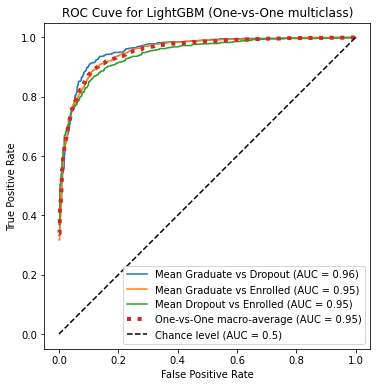

In [ ]:
ovo_tpr = np.zeros_like(fpr_grid)

fig, ax = plt.subplots(figsize=(6, 6))
for ix, (label_a, label_b) in enumerate(pair_list):
    ovo_tpr += mean_tpr[ix]
    plt.plot(
        fpr_grid,
        mean_tpr[ix],
        label=f"Mean {names[label_a]} vs {names[label_b]} (AUC = {pair_scores[ix]:.2f})",
    )

ovo_tpr /= sum(1 for pair in enumerate(pair_list))

plt.plot(
    fpr_grid,
    ovo_tpr,
    label=f"One-vs-One macro-average (AUC = {macro_roc_auc_ovo:.2f})",
    linestyle=":",
    linewidth=4,
)
plt.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Cuve for LightGBM (One-vs-One multiclass)")
plt.legend()
plt.savefig('roc_lgbm.png',dpi=300, bbox_inches = "tight")
plt.show()

## LightGBM => SHAP 

In [ ]:
explainer = shap.Explainer(lgbm_opt.predict, X_test_smote) # will give value, base_value, data

In [ ]:
shap_values = explainer(X_test_smote)

Permutation explainer: 1327it [08:49,  2.49it/s]                                                                       


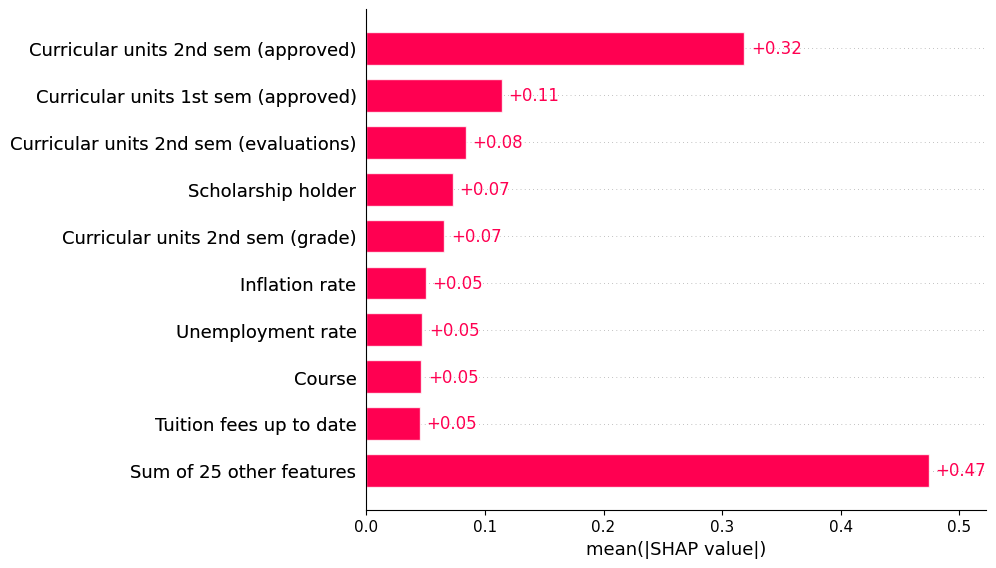

In [ ]:
shap.plots.bar(shap_values)

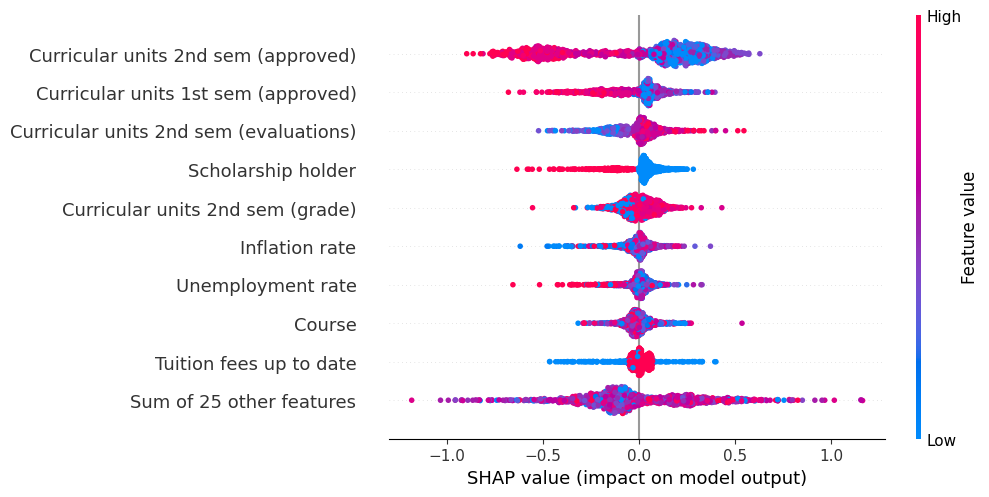

In [ ]:
shap.plots.beeswarm(shap_values)

## CatBoost => SHAP 

In [ ]:
explainer = shap.Explainer(cat_opt.predict, X_test_smote)  

In [ ]:
shap_values = explainer(X_test_smote)

Permutation explainer: 1327it [04:49,  4.37it/s]                                                                       


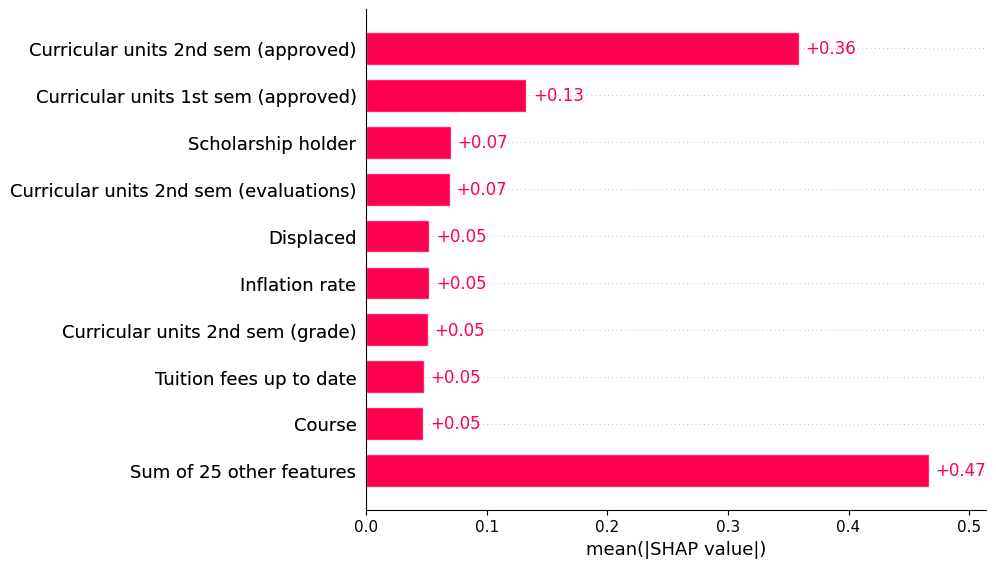

In [ ]:
shap.plots.bar(shap_values)

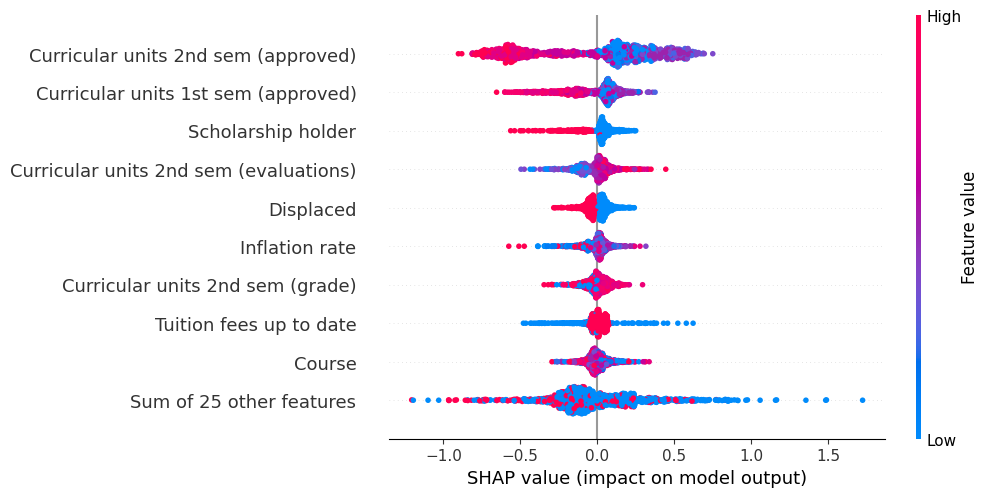

In [ ]:
shap.plots.beeswarm(shap_values)

## Trials Values with Cross Validation

In [ ]:
lgbm_trials = []
for i in study_lightgbm.trials:
    lgbm_trials.append(i.values[0])
cat_trials = []
for i in cat_study.trials:
    cat_trials.append(i.values[0])
pd.DataFrame({'LightGBM':lgbm_trials,'Catboost':cat_trials}).to_csv('trials_values_optuna.csv')

# PART 3 => 
## Unsupervized Algorithm

## Isolation Forest

#### TEST 1 - Default contamination

In [ ]:
isof = IsolationForest().fit(X_train_smote)
isof_pred = isof.predict(X_test_smote)

In [ ]:
(isof_pred==-1).sum() # num outliers 

197

In [ ]:
comp = pd.DataFrame(Y_test_smote) # compare target  

In [ ]:
comp

,Target
6298,2
5568,2
69,2
3462,1
4607,1
...,...
4200,0
2321,2
5594,2
43,1


In [ ]:
comp["IF"] = isof_pred # Y test showing real value X isolation forest 
comp # -1 -> anomalies / it is supposed to consider dropout (1) e os enrolled (2) as anomalies 

,Target,IF
6298,2,1
5568,2,1
69,2,1
3462,1,-1
4607,1,-1
...,...,...
4200,0,1
2321,2,1
5594,2,1
43,1,1


In [ ]:
# how many dropouts the model pointed as anomalies

In [ ]:
comp[(comp["Target"]==1)  & (comp["IF"]==-1)] # find cases in which it was a dropout and the model considered as a outlier

,Target,IF
3462,1,-1
4607,1,-1
4509,1,-1
1547,1,-1
1799,1,-1
...,...,...
3839,1,-1
968,1,-1
4673,1,-1
3223,1,-1


In [ ]:
comp[(comp["Target"]==2)  & (comp["IF"]==-1)] # same process for enrolled

,Target,IF
1959,2,-1
6097,2,-1
6361,2,-1
5813,2,-1
5716,2,-1
3328,2,-1
4153,2,-1
6272,2,-1
3312,2,-1
4132,2,-1


In [ ]:
comp[(comp["Target"]==2)  & (comp["IF"]==-1)].shape

(20, 2)

In [ ]:
comp[(comp["Target"]==0)  & (comp["IF"]==-1)]

,Target,IF
1007,0,-1
3683,0,-1
1397,0,-1
4318,0,-1
2827,0,-1
...,...,...
3093,0,-1
2387,0,-1
370,0,-1
1669,0,-1


In [ ]:
Y_test_smote.value_counts()

1    460
2    433
0    433
Name: Target, dtype: int64

### TEST 2 - Contamination 0.5 

In [ ]:
isof_c = IsolationForest(contamination=0.5).fit(X_train_smote)
isof_pred_c = isof_c.predict(X_test_smote)

In [ ]:
Y_test_smote.value_counts()

1    460
2    433
0    433
Name: Target, dtype: int64

In [ ]:
(isof_pred_c== -1).sum() # how many anomalies the model detected

693

In [ ]:
comp_c = pd.DataFrame(Y_test_smote)
comp_c["IF"] = isof_pred_c
comp_c

,Target,IF
6298,2,-1
5568,2,-1
69,2,1
3462,1,-1
4607,1,-1
...,...,...
4200,0,1
2321,2,-1
5594,2,1
43,1,1


In [ ]:
comp_c[(comp_c["Target"]==1)  & (comp_c["IF"]==-1)] # how many dropouts the model identified as anomalies

,Target,IF
3462,1,-1
4607,1,-1
419,1,-1
1952,1,-1
3347,1,-1
...,...,...
3223,1,-1
4433,1,-1
5027,1,-1
2382,1,-1


In [ ]:
comp_c[(comp_c["Target"]==2)  & (comp_c["IF"]==-1)] # how many enrolled the model identified as anomalies

,Target,IF
6298,2,-1
5568,2,-1
5982,2,-1
2156,2,-1
1967,2,-1
...,...,...
5564,2,-1
346,2,-1
5576,2,-1
2321,2,-1


In [ ]:
comp_c[(comp_c["Target"]==0)  & (comp_c["IF"]==-1)] # showing the mistakes, when the model considered to be an anomaly but in reality was "graduate"; which is not an anomaly 

,Target,IF
3973,0,-1
1007,0,-1
2210,0,-1
3480,0,-1
3683,0,-1
...,...,...
1041,0,-1
2214,0,-1
3315,0,-1
828,0,-1
